# Medcat with SNOMED performance analysis

## Define Functions

## Function to calculate `Semantic Similarity` (Using Phrase Embeddings)

In [1]:
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('pritamdeka/S-BioBert-snli-multinli-stsb')

def calculateSemanticSimilarityScore(conceptName, mappedConceptName):
    if mappedConceptName and (mappedConceptName != 'nan'):
        mappedConceptName = str(mappedConceptName)
        if len(mappedConceptName) > 0:
            conceptNameEmbedding = model.encode(conceptName, convert_to_tensor=True)
            mappedConceptNameEmbedding = model.encode(mappedConceptName, convert_to_tensor=True)
            similarityScore = util.pytorch_cos_sim(conceptNameEmbedding, mappedConceptNameEmbedding)
            return similarityScore.item()
    return 0

### Function to calculate closest concept to the search phrase

In [2]:
def getMaxConcept(row):
    sssMedcat = calculateSemanticSimilarityScore(str(row.sourceName), str(row.medcatConcept))
    sssFuzzy = calculateSemanticSimilarityScore(str(row.sourceName), str(row.fuzzyConcept))
    sssReverseIndex = calculateSemanticSimilarityScore(str(row.sourceName), str(row.reverseIndexConcept))
    sssArray = [sssMedcat, sssFuzzy, sssReverseIndex]
    ix = sssArray.index(max(sssArray))
    if ix == 0:
        return row.medcatConcept
    elif ix == 1:
        return row.fuzzyConcept
    elif ix == 2:
        return row.reverseIndexConcept
    else:
        return None


## Illness

### Read standard concepts

In [3]:
import pandas as pd

athenaDf = pd.read_csv('data/CONCEPT.csv', sep='\t', dtype=str)
illnessDf = athenaDf[(athenaDf.vocabulary_id == 'SNOMED') & (athenaDf.domain_id == 'Condition') & (athenaDf.concept_class_id == 'Clinical Finding')]
illnessDf

,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,valid_end_date,invalid_reason
2254914,43530605,Pulmonary embolism with pulmonary infarction,Condition,SNOMED,Clinical Finding,S,1001000119102,20130731,20991231,NaN
2254915,45757048,Asymmetry of prostate,Condition,SNOMED,Clinical Finding,S,100191000119105,20150131,20991231,NaN
2254916,46269689,Muscle spasm of thoracic back,Condition,SNOMED,Clinical Finding,S,100211000119106,20150731,20991231,NaN
2254917,36712666,Acquired pericardial cyst,Condition,SNOMED,Clinical Finding,S,100231000119101,20170131,20991231,NaN
2254918,37016098,Myelopathy due to spinal stenosis of lumbar re...,Condition,SNOMED,Clinical Finding,S,100491000119103,20160131,20991231,NaN
...,...,...,...,...,...,...,...,...,...,...
3289926,4018781,Subarachnoid hemorrhage following injury with ...,Condition,SNOMED,Clinical Finding,NaN,209941001,20020131,20200730,D
3289927,4014661,Subarachnoid hemorrhage following injury with ...,Condition,SNOMED,Clinical Finding,NaN,209943003,20020131,20200730,D
3289928,4014785,Subdural hemorrhage following injury with open...,Condition,SNOMED,Clinical Finding,NaN,209959003,20020131,20200730,D
3289929,4019476,Subdural hemorrhage following injury with open...,Condition,SNOMED,Clinical Finding,NaN,209961007,20020131,20200730,D


### Read illness file

In [4]:
import pandas as pd

sourceIllnessDf = pd.read_csv('data/20002_non-cancer_illness.csv', dtype=str)
sourceIllnessDf = sourceIllnessDf[sourceIllnessDf.sourceName.notna()]
sourceIllnessDf

,sourceCode,sourceName,sourceValueCode,sourceValueName,sourceUnitName,sourceFrequency,sourceAutoAssignedConceptIds,matchScore,mappingStatus,statusSetBy,statusSetOn,conceptId,mappingType,comment,createdBy,createdOn
0,20002,diabetes,1220,diabetes,NaN,23996,NaN,0.8904300332069397,APPROVED,Vaclav,1604396402676,201820,VALUE,NaN,Vaclav,1604396395977
1,20002,fracture hand,1638,fracture hand,NaN,441,NaN,0.8478937149047852,APPROVED,Vaclav,1604397104088,4071876,VALUE,NaN,<auto>,1604359804705
2,20002,uterine problem,1552,uterine problem,NaN,91,NaN,0.7672346234321594,APPROVED,Vaclav,1604404677075,4129177,VALUE,NaN,Vaclav,1604404675001
3,20002,asbestosis,1120,asbestosis,NaN,208,NaN,1.0,APPROVED,Vaclav,1604361691699,256450,VALUE,NaN,<auto>,1604359804727
4,20002,haemophilia,1328,haemophilia,NaN,78,NaN,1.0,APPROVED,Vaclav,1604361697782,4236898,VALUE,NaN,<auto>,1604359804809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,20002,endometriosis,1402,endometriosis,NaN,4533,NaN,1.0,APPROVED,Vaclav,1604395600509,433527,VALUE,NaN,<auto>,1604359879127
442,20002,bell's palsy/facial nerve palsy,1250,bell's palsy/facial nerve palsy,NaN,588,NaN,0.6373665928840637,APPROVED,Vaclav,1604417223795,374923,VALUE,NaN,<auto>,1604359879335
443,20002,female infertility,1403,female infertility,NaN,674,NaN,1.0,APPROVED,Vaclav,1604395603304,201909,VALUE,NaN,<auto>,1604359879718
444,20002,male infertility,1404,male infertility,NaN,38,NaN,1.0,APPROVED,Vaclav,1604395604447,198197,VALUE,NaN,<auto>,1604359880370


### Read illness mapped file

In [5]:
import pandas as pd

mappedIllnessDf = pd.read_csv('data/20002_non-cancer_illness_mapped_majority_voting.csv')
mappedIllnessDf

,Unnamed: 0,searchPhrase,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting,confidence
0,0,diabetes,Diabetes mellitus,Prediabetes,Diabetic neuropathy &/or diabetic polyneuropathy,Diabetes mellitus,Low
1,1,diabetes,Diabetes mellitus,Prediabetes,Diabetic neuropathy &/or diabetic polyneuropathy,Prediabetes,Low
2,2,diabetes,Diabetes mellitus,Prediabetes,Diabetic neuropathy &/or diabetic polyneuropathy,Diabetic neuropathy &/or diabetic polyneuropathy,Low
3,3,fracture hand,Fracture of hand,Fracture of hand,Fracture of hand,Fracture of hand,High
4,4,uterine problem,Uterine structure,Uterine prolapse,Uterine contractions problem,Uterine structure,Low
...,...,...,...,...,...,...,...
900,900,female infertility,Female infertility,Female infertility,Female infertility,Female infertility,High
901,901,male infertility,Male infertility,Male infertility,Male infertility,Male infertility,High
902,902,other renal/kidney problem,Kidney structure,Peer problem in remission,Ether overdose,Kidney structure,Low
903,903,other renal/kidney problem,Kidney structure,Peer problem in remission,Ether overdose,Peer problem in remission,Low


### Create illness aggregate dataframe

In [6]:
mappedIllnessMedcatDf = mappedIllnessDf[mappedIllnessDf.medcatConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'medcatConcept'].agg(['unique'])
mappedIllnessMedcatDf.reset_index(drop = True, inplace = True)
mappedIllnessMedcatDf.columns = mappedIllnessMedcatDf.columns.droplevel(1)
mappedIllnessMedcatDf.medcatConcept = mappedIllnessMedcatDf.medcatConcept.apply(lambda x: x[0])
mappedIllnessMedcatDf.searchPhrase = mappedIllnessMedcatDf.searchPhrase.apply(lambda x: str(x[0]))
mappedIllnessFuzzyDf = mappedIllnessDf[mappedIllnessDf.fuzzyConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'fuzzyConcept'].agg(['unique'])
mappedIllnessFuzzyDf.reset_index(drop = True, inplace = True)
mappedIllnessFuzzyDf.columns = mappedIllnessFuzzyDf.columns.droplevel(1)
mappedIllnessFuzzyDf.fuzzyConcept = mappedIllnessFuzzyDf.fuzzyConcept.apply(lambda x: x[0])
mappedIllnessFuzzyDf.searchPhrase = mappedIllnessFuzzyDf.searchPhrase.apply(lambda x: str(x[0]))
mappedIllnessReverseIndexDf = mappedIllnessDf[mappedIllnessDf.reverseIndexConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'reverseIndexConcept'].agg(['unique'])
mappedIllnessReverseIndexDf.reset_index(drop = True, inplace = True)
mappedIllnessReverseIndexDf.columns = mappedIllnessReverseIndexDf.columns.droplevel(1)
mappedIllnessReverseIndexDf.reverseIndexConcept = mappedIllnessReverseIndexDf.reverseIndexConcept.apply(lambda x: x[0])
mappedIllnessReverseIndexDf.searchPhrase = mappedIllnessReverseIndexDf.searchPhrase.apply(lambda x: str(x[0]))
mappedIllnessMajorityVotingDf = mappedIllnessDf[mappedIllnessDf.majorityVoting.notna() & mappedIllnessDf.confidence.isin(['Medium', 'High'])].groupby(['searchPhrase'])['searchPhrase', 'majorityVoting'].agg(['unique'])
mappedIllnessMajorityVotingDf.reset_index(drop = True, inplace = True)
mappedIllnessMajorityVotingDf.columns = mappedIllnessMajorityVotingDf.columns.droplevel(1)
mappedIllnessMajorityVotingDf.majorityVoting = mappedIllnessMajorityVotingDf.majorityVoting.apply(lambda x: x[0])
mappedIllnessMajorityVotingDf.searchPhrase = mappedIllnessMajorityVotingDf.searchPhrase.apply(lambda x: str(x[0]))

/tmp/ipykernel_1253201/2855382503.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mappedIllnessMedcatDf = mappedIllnessDf[mappedIllnessDf.medcatConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'medcatConcept'].agg(['unique'])
/tmp/ipykernel_1253201/2855382503.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mappedIllnessFuzzyDf = mappedIllnessDf[mappedIllnessDf.fuzzyConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'fuzzyConcept'].agg(['unique'])
/tmp/ipykernel_1253201/2855382503.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mappedIllnessReverseIndexDf = mappedIllnessDf[mappedIllnessDf.reverseIndexConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'reverseIndexConcept'].agg(['unique'])
/tmp/ipykernel_125320

In [7]:
mappedIllnessCuratedDf = sourceIllnessDf\
    .merge(illnessDf, how='left', left_on='conceptId', right_on='concept_id')[['sourceName', 'sourceValueCode', 'concept_name', 'mappingStatus']]
mappedIllnessCuratedDf = mappedIllnessCuratedDf.rename(columns={'concept_name': 'curatedConcept', 'mappingStatus': 'curatedStatus'})
mappedIllnessCuratedDf

,sourceName,sourceValueCode,curatedConcept,curatedStatus
0,diabetes,1220,Diabetes mellitus,APPROVED
1,fracture hand,1638,Fracture of hand,APPROVED
2,uterine problem,1552,Uterus problem,APPROVED
3,asbestosis,1120,Asbestosis,APPROVED
4,haemophilia,1328,Hemophilia,APPROVED
...,...,...,...,...
440,endometriosis,1402,Endometriosis (clinical),APPROVED
441,bell's palsy/facial nerve palsy,1250,Bell's palsy,APPROVED
442,female infertility,1403,Female infertility,APPROVED
443,male infertility,1404,Male infertility,APPROVED


In [8]:
# pd.concat([mappedOperationsCuratedDf, mappedOperationsFuzzyDf], keys=['sourceValueCode', 'id'])
mappedIllnessFullDf = mappedIllnessCuratedDf\
    .merge(mappedIllnessMedcatDf, how='left', left_on='sourceName', right_on='searchPhrase').drop(columns=['searchPhrase'])\
        .merge(mappedIllnessFuzzyDf, how='left', left_on='sourceName', right_on='searchPhrase').drop(columns=['searchPhrase'])\
            .merge(mappedIllnessReverseIndexDf, how='left', left_on='sourceName', right_on='searchPhrase').drop(columns=['searchPhrase'])\
                .merge(mappedIllnessMajorityVotingDf, how='left', left_on='sourceName', right_on='searchPhrase').drop(columns=['searchPhrase'])
mappedIllnessFullDf

,sourceName,sourceValueCode,curatedConcept,curatedStatus,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting
0,diabetes,1220,Diabetes mellitus,APPROVED,Diabetes mellitus,Prediabetes,Diabetic neuropathy &/or diabetic polyneuropathy,NaN
1,fracture hand,1638,Fracture of hand,APPROVED,Fracture of hand,Fracture of hand,Fracture of hand,Fracture of hand
2,uterine problem,1552,Uterus problem,APPROVED,Uterine structure,Uterine prolapse,Uterine contractions problem,NaN
3,asbestosis,1120,Asbestosis,APPROVED,Asbestosis,Asbestosis,Asbestosis,Asbestosis
4,haemophilia,1328,Hemophilia,APPROVED,NaN,Hemophilia,Hemophilia,Hemophilia
...,...,...,...,...,...,...,...,...
440,endometriosis,1402,Endometriosis (clinical),APPROVED,Endometriosis,Endometriosis,Endometriosis,Endometriosis
441,bell's palsy/facial nerve palsy,1250,Bell's palsy,APPROVED,Facial palsy,Bell's palsy &/or facial palsy,Bell's palsy,NaN
442,female infertility,1403,Female infertility,APPROVED,Female infertility,Female infertility,Female infertility,Female infertility
443,male infertility,1404,Male infertility,APPROVED,Male infertility,Male infertility,Male infertility,Male infertility


In [9]:
mappedIllnessFullDf['majorityVotingPlus'] = mappedIllnessFullDf.majorityVoting
mappedIllnessFullDf.loc[mappedIllnessFullDf.majorityVoting.isna(), 'majorityVotingPlus'] = mappedIllnessFullDf[mappedIllnessFullDf.majorityVoting.isna()].apply(func=getMaxConcept, axis=1)
mappedIllnessFullDf

,sourceName,sourceValueCode,curatedConcept,curatedStatus,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting,majorityVotingPlus
0,diabetes,1220,Diabetes mellitus,APPROVED,Diabetes mellitus,Prediabetes,Diabetic neuropathy &/or diabetic polyneuropathy,NaN,Diabetes mellitus
1,fracture hand,1638,Fracture of hand,APPROVED,Fracture of hand,Fracture of hand,Fracture of hand,Fracture of hand,Fracture of hand
2,uterine problem,1552,Uterus problem,APPROVED,Uterine structure,Uterine prolapse,Uterine contractions problem,NaN,Uterine contractions problem
3,asbestosis,1120,Asbestosis,APPROVED,Asbestosis,Asbestosis,Asbestosis,Asbestosis,Asbestosis
4,haemophilia,1328,Hemophilia,APPROVED,NaN,Hemophilia,Hemophilia,Hemophilia,Hemophilia
...,...,...,...,...,...,...,...,...,...
440,endometriosis,1402,Endometriosis (clinical),APPROVED,Endometriosis,Endometriosis,Endometriosis,Endometriosis,Endometriosis
441,bell's palsy/facial nerve palsy,1250,Bell's palsy,APPROVED,Facial palsy,Bell's palsy &/or facial palsy,Bell's palsy,NaN,Bell's palsy &/or facial palsy
442,female infertility,1403,Female infertility,APPROVED,Female infertility,Female infertility,Female infertility,Female infertility,Female infertility
443,male infertility,1404,Male infertility,APPROVED,Male infertility,Male infertility,Male infertility,Male infertility,Male infertility


### Visualise the mapping performance

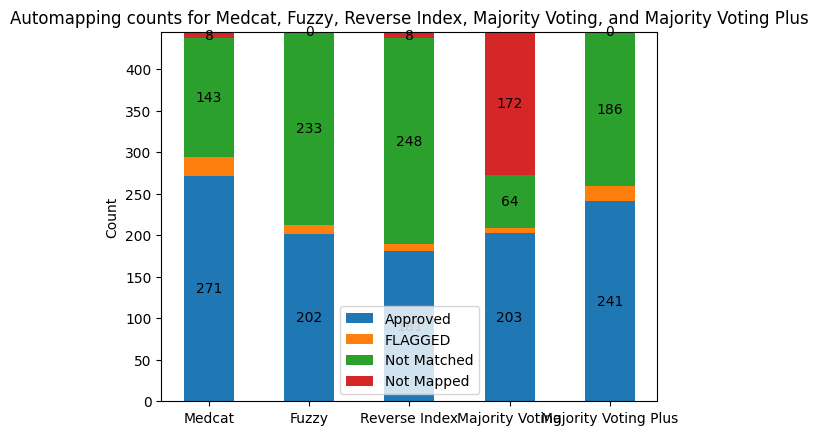

In [10]:
import matplotlib.pyplot as plt


labels = ['Medcat', 'Fuzzy', 'Reverse Index', 'Majority Voting', 'Majority Voting Plus']
approved = [
       mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED') & (mappedIllnessFullDf.curatedConcept == mappedIllnessFullDf.medcatConcept)].shape[0],
       mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED') & (mappedIllnessFullDf.curatedConcept == mappedIllnessFullDf.fuzzyConcept)].shape[0],
       mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED') & (mappedIllnessFullDf.curatedConcept == mappedIllnessFullDf.reverseIndexConcept)].shape[0],
       mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED') & (mappedIllnessFullDf.curatedConcept == mappedIllnessFullDf.majorityVoting)].shape[0],
       mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED') & (mappedIllnessFullDf.curatedConcept == mappedIllnessFullDf.majorityVotingPlus)].shape[0],
       ]
flagged = [
       mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'FLAGGED') & (mappedIllnessFullDf.curatedConcept == mappedIllnessFullDf.medcatConcept)].shape[0],
       mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'FLAGGED') & (mappedIllnessFullDf.curatedConcept == mappedIllnessFullDf.fuzzyConcept)].shape[0],
       mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'FLAGGED') & (mappedIllnessFullDf.curatedConcept == mappedIllnessFullDf.reverseIndexConcept)].shape[0],
       mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'FLAGGED') & (mappedIllnessFullDf.curatedConcept == mappedIllnessFullDf.majorityVoting)].shape[0],
       mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'FLAGGED') & (mappedIllnessFullDf.curatedConcept == mappedIllnessFullDf.majorityVotingPlus)].shape[0],
       ]
not_mapped = [
       (mappedIllnessFullDf.shape[0] - mappedIllnessFullDf.medcatConcept.notna().sum()),
       (mappedIllnessFullDf.shape[0] - mappedIllnessFullDf.fuzzyConcept.notna().sum()),
       (mappedIllnessFullDf.shape[0] - mappedIllnessFullDf.reverseIndexConcept.notna().sum()),
       (mappedIllnessFullDf.shape[0] - mappedIllnessFullDf.majorityVoting.notna().sum()),
       (mappedIllnessFullDf.shape[0] - mappedIllnessFullDf.majorityVotingPlus.notna().sum()),
       ]
not_matching = [
       mappedIllnessFullDf[mappedIllnessFullDf.medcatConcept.notna() & (mappedIllnessFullDf.curatedConcept != mappedIllnessFullDf.medcatConcept)].shape[0],
       mappedIllnessFullDf[mappedIllnessFullDf.fuzzyConcept.notna() & (mappedIllnessFullDf.curatedConcept != mappedIllnessFullDf.fuzzyConcept)].shape[0],
       mappedIllnessFullDf[mappedIllnessFullDf.reverseIndexConcept.notna() & (mappedIllnessFullDf.curatedConcept != mappedIllnessFullDf.reverseIndexConcept)].shape[0],
       mappedIllnessFullDf[mappedIllnessFullDf.majorityVoting.notna() & (mappedIllnessFullDf.curatedConcept != mappedIllnessFullDf.majorityVoting)].shape[0],
       mappedIllnessFullDf[mappedIllnessFullDf.majorityVotingPlus.notna() & (mappedIllnessFullDf.curatedConcept != mappedIllnessFullDf.majorityVotingPlus)].shape[0],
       ]
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

p1 = ax.bar(labels, approved, width, label='Approved')
p2 = ax.bar(labels, flagged, width, bottom=approved, label='FLAGGED')
p2 = ax.bar(labels, not_matching, width, bottom=[v + flagged[i] for i, v in enumerate(approved)], label='Not Matched')
p3 = ax.bar(labels, not_mapped, width, bottom=[a + f + not_matching[i] for i, (a, f) in enumerate(zip(approved, flagged))], label='Not Mapped')

ax.set_ylabel('Count')
ax.set_title('Automapping counts for Medcat, Fuzzy, Reverse Index, Majority Voting, and Majority Voting Plus')
ax.legend()

ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p3, label_type='center')

plt.show()

### Caclucate semantic similarity scores

In [11]:
mappedIllnessFullDf['semantic_similarity_score_curated'] = [calculateSemanticSimilarityScore(str(row['sourceName']), str(row['curatedConcept'])) for _, row in mappedIllnessFullDf.iterrows()]
mappedIllnessFullDf['semantic_similarity_score_medcat'] = [calculateSemanticSimilarityScore(str(row['sourceName']), str(row['medcatConcept'])) for _, row in mappedIllnessFullDf.iterrows()]
mappedIllnessFullDf['semantic_similarity_score_fuzzy'] = [calculateSemanticSimilarityScore(str(row['sourceName']), str(row['fuzzyConcept'])) for _, row in mappedIllnessFullDf.iterrows()]
mappedIllnessFullDf['semantic_similarity_score_reverse_index'] = [calculateSemanticSimilarityScore(str(row['sourceName']), str(row['reverseIndexConcept'])) for _, row in mappedIllnessFullDf.iterrows()]
mappedIllnessFullDf['semantic_similarity_score_majority_voting'] = [calculateSemanticSimilarityScore(str(row['sourceName']), str(row['majorityVoting'])) for _, row in mappedIllnessFullDf.iterrows()]
mappedIllnessFullDf['semantic_similarity_score_majority_voting_plus'] = [calculateSemanticSimilarityScore(str(row['sourceName']), str(row['majorityVotingPlus'])) for _, row in mappedIllnessFullDf.iterrows()]
mappedIllnessFullDf

,sourceName,sourceValueCode,curatedConcept,curatedStatus,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting,majorityVotingPlus,semantic_similarity_score_curated,semantic_similarity_score_medcat,semantic_similarity_score_fuzzy,semantic_similarity_score_reverse_index,semantic_similarity_score_majority_voting,semantic_similarity_score_majority_voting_plus
0,diabetes,1220,Diabetes mellitus,APPROVED,Diabetes mellitus,Prediabetes,Diabetic neuropathy &/or diabetic polyneuropathy,NaN,Diabetes mellitus,0.798972,0.798972,0.591126,0.614622,0.000000,0.798972
1,fracture hand,1638,Fracture of hand,APPROVED,Fracture of hand,Fracture of hand,Fracture of hand,Fracture of hand,Fracture of hand,0.876594,0.876594,0.876594,0.876594,0.876594,0.876594
2,uterine problem,1552,Uterus problem,APPROVED,Uterine structure,Uterine prolapse,Uterine contractions problem,NaN,Uterine contractions problem,0.902381,0.678367,0.725670,0.828172,0.000000,0.828172
3,asbestosis,1120,Asbestosis,APPROVED,Asbestosis,Asbestosis,Asbestosis,Asbestosis,Asbestosis,0.955248,0.955248,0.955248,0.955248,0.955248,0.955248
4,haemophilia,1328,Hemophilia,APPROVED,NaN,Hemophilia,Hemophilia,Hemophilia,Hemophilia,0.737507,0.000000,0.737507,0.737507,0.737507,0.737507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,endometriosis,1402,Endometriosis (clinical),APPROVED,Endometriosis,Endometriosis,Endometriosis,Endometriosis,Endometriosis,0.891370,0.967853,0.967853,0.967853,0.967853,0.967853
441,bell's palsy/facial nerve palsy,1250,Bell's palsy,APPROVED,Facial palsy,Bell's palsy &/or facial palsy,Bell's palsy,NaN,Bell's palsy &/or facial palsy,0.814919,0.677626,0.825389,0.814919,0.000000,0.825389
442,female infertility,1403,Female infertility,APPROVED,Female infertility,Female infertility,Female infertility,Female infertility,Female infertility,0.994405,0.994405,0.994405,0.994405,0.994405,0.994405
443,male infertility,1404,Male infertility,APPROVED,Male infertility,Male infertility,Male infertility,Male infertility,Male infertility,0.991546,0.991546,0.991546,0.991546,0.991546,0.991546


### Plot the average semantic similarity scores

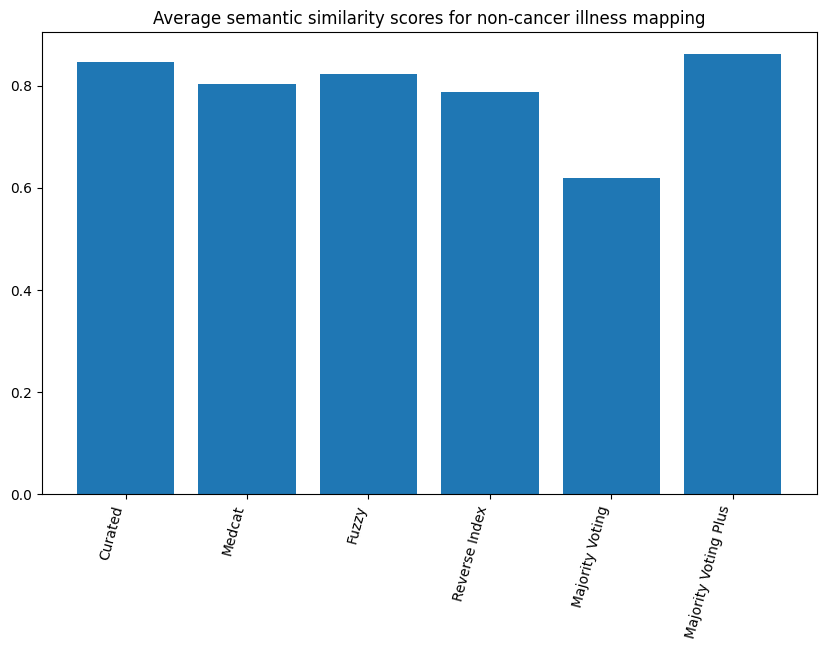

In [12]:
avg_semantic_similarity_score_curated = mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED') & (mappedIllnessFullDf['curatedConcept'].notna())]['semantic_similarity_score_curated'].sum()/mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED')].shape[0]
avg_semantic_similarity_score_medcat = mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED') & (mappedIllnessFullDf['medcatConcept'].notna())]['semantic_similarity_score_medcat'].sum()/mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED')].shape[0]
avg_semantic_similarity_score_fuzzy = mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED') & (mappedIllnessFullDf['fuzzyConcept'].notna())]['semantic_similarity_score_fuzzy'].sum()/mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED')].shape[0]
avg_semantic_similarity_score_reverse_index = mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED') & (mappedIllnessFullDf['reverseIndexConcept'].notna())]['semantic_similarity_score_reverse_index'].sum()/mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED')].shape[0]
avg_semantic_similarity_score_majority_voting = mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED') & (mappedIllnessFullDf['majorityVoting'].notna())]['semantic_similarity_score_majority_voting'].sum()/mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED')].shape[0]
avg_semantic_similarity_score_majority_voting_plus = mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED') & (mappedIllnessFullDf['majorityVotingPlus'].notna())]['semantic_similarity_score_majority_voting_plus'].sum()/mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED')].shape[0]

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    x=['Curated', 'Medcat', 'Fuzzy', 'Reverse Index', 'Majority Voting', 'Majority Voting Plus'],
    height=[
        avg_semantic_similarity_score_curated, avg_semantic_similarity_score_medcat, avg_semantic_similarity_score_fuzzy, avg_semantic_similarity_score_reverse_index, avg_semantic_similarity_score_majority_voting, avg_semantic_similarity_score_majority_voting_plus
        ],
    )
ax.set_title('Average semantic similarity scores for non-cancer illness mapping')
plt.xticks(rotation=75, ha='right')
plt.show()

## Cancer

### Read standard concepts

In [13]:
import pandas as pd

athenaDf = pd.read_csv('data/CONCEPT.csv', sep='\t', dtype=str)
illnessDf = athenaDf[athenaDf.invalid_reason.isna() & (athenaDf.standard_concept == 'S') & (athenaDf.vocabulary_id == 'SNOMED') & (athenaDf.domain_id == 'Condition') & (athenaDf.concept_class_id == 'Clinical Finding')]
illnessDf

,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,valid_end_date,invalid_reason
2254914,43530605,Pulmonary embolism with pulmonary infarction,Condition,SNOMED,Clinical Finding,S,1001000119102,20130731,20991231,NaN
2254915,45757048,Asymmetry of prostate,Condition,SNOMED,Clinical Finding,S,100191000119105,20150131,20991231,NaN
2254916,46269689,Muscle spasm of thoracic back,Condition,SNOMED,Clinical Finding,S,100211000119106,20150731,20991231,NaN
2254917,36712666,Acquired pericardial cyst,Condition,SNOMED,Clinical Finding,S,100231000119101,20170131,20991231,NaN
2254918,37016098,Myelopathy due to spinal stenosis of lumbar re...,Condition,SNOMED,Clinical Finding,S,100491000119103,20160131,20991231,NaN
...,...,...,...,...,...,...,...,...,...,...
3271658,3663265,Sprain of ulnar carpal complex ligament,Condition,SNOMED,Clinical Finding,S,870768000,20200731,20991231,NaN
3271659,3663266,Presenting part of fetus not engaged,Condition,SNOMED,Clinical Finding,S,871478009,20200731,20991231,NaN
3271669,3663278,Acquired abnormality of atrioventricular (not ...,Condition,SNOMED,Clinical Finding,S,874782009,20200731,20991231,NaN
3271672,3663281,Lower respiratory infection caused by SARS-CoV-2,Condition,SNOMED,Clinical Finding,S,880529761000119102,20200731,20991231,NaN


### Read cancer file

In [14]:
import pandas as pd

sourceCancerDf = pd.read_csv('data/20001_cancer.csv', dtype=str)
sourceCancerDf = sourceCancerDf[sourceCancerDf.sourceName.notna()]
sourceCancerDf

,sourceCode,sourceName,sourceValueCode,sourceValueName,sourceUnitName,sourceFrequency,sourceAutoAssignedConceptIds,matchScore,mappingStatus,statusSetBy,statusSetOn,conceptId,mappingType,comment,createdBy,createdOn
0,20001,mesothelioma,1064,mesothelioma,NaN,6,NaN,1.0,APPROVED,Vaclav,1604336414027,4033891,VALUE,NaN,<auto>,1604336140174
1,20001,penis cancer,1046,penis cancer,NaN,44,NaN,0.690782368183136,APPROVED,Vaclav,1604347501048,4181488,VALUE,NaN,<auto>,1604336140460
2,20001,non-hodgkins lymphoma,1053,non-hodgkins lymphoma,NaN,1129,NaN,0.9415006637573242,APPROVED,Vaclav,1604342253671,4038838,VALUE,NaN,Vaclav,1604342251312
3,20001,trachea cancer,1080,trachea cancer,NaN,3,NaN,0.826101541519165,APPROVED,Vaclav,1604343033001,4177112,VALUE,NaN,<auto>,1604336140804
4,20001,multiple myeloma,1050,multiple myeloma,NaN,220,NaN,1.0,APPROVED,Vaclav,1604341510127,437233,VALUE,NaN,Vaclav,1604341507079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,20001,respiratory / intrathoracic cancer,1084,respiratory / intrathoracic cancer,NaN,1,NaN,0.603688657283783,FLAGGED,NaN,0,40493428,VALUE,NaN,Vaclav,1604357739118
78,20001,metastatic cancer (unknown primary),1071,metastatic cancer (unknown primary),NaN,45,NaN,0.6619357466697693,APPROVED,Vaclav,1604348276059,4114221,VALUE,NaN,<auto>,1604336172759
79,20001,kidney/renal cell cancer,1034,kidney/renal cell cancer,NaN,727,NaN,0.539291501045227,FLAGGED,NaN,0,196653,VALUE,NaN,Vaclav,1604358143447
80,20001,small intestine/small bowel cancer,1019,small intestine/small bowel cancer,NaN,250,NaN,0.5331474542617798,FLAGGED,NaN,0,4131614,VALUE,NaN,Vaclav,1604358891387


### Read cancer mapped file

In [15]:
import pandas as pd

mappedCancerDf = pd.read_csv('data/20001_cancer_mapped_majority_voting.csv')
mappedCancerDf

,Unnamed: 0,searchPhrase,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting,confidence
0,0,mesothelioma,"Mesothelioma, malignant",Medulloepithelioma,(Mesothelioma of lung) or ([X]mesothelioma of ...,"Mesothelioma, malignant",Low
1,1,mesothelioma,"Mesothelioma, malignant",Medulloepithelioma,(Mesothelioma of lung) or ([X]mesothelioma of ...,Medulloepithelioma,Low
2,2,mesothelioma,"Mesothelioma, malignant",Medulloepithelioma,(Mesothelioma of lung) or ([X]mesothelioma of ...,(Mesothelioma of lung) or ([X]mesothelioma of ...,Low
3,3,penis cancer,Malignant tumor of penis,Ca penis,Metastatic penile cancer,Malignant tumor of penis,Low
4,4,penis cancer,Malignant tumor of penis,Ca penis,Metastatic penile cancer,Ca penis,Low
...,...,...,...,...,...,...,...
219,219,small intestine/small bowel cancer,Small,Internal small bowel fistula,Finding of small intestine,Internal small bowel fistula,Low
220,220,small intestine/small bowel cancer,Small,Internal small bowel fistula,Finding of small intestine,Finding of small intestine,Low
221,221,cin/pre-cancer cells cervix,"Tumor cells, malignant",Non-anemic red cell disorder,Squamous cell carcinoma of cervix,"Tumor cells, malignant",Low
222,222,cin/pre-cancer cells cervix,"Tumor cells, malignant",Non-anemic red cell disorder,Squamous cell carcinoma of cervix,Non-anemic red cell disorder,Low


### Create illness aggregate dataframe

In [16]:
mappedCancerMedcatDf = mappedCancerDf[mappedCancerDf.medcatConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'medcatConcept'].agg(['unique'])
mappedCancerMedcatDf.reset_index(drop = True, inplace = True)
mappedCancerMedcatDf.columns = mappedCancerMedcatDf.columns.droplevel(1)
mappedCancerMedcatDf.medcatConcept = mappedCancerMedcatDf.medcatConcept.apply(lambda x: x[0])
mappedCancerMedcatDf.searchPhrase = mappedCancerMedcatDf.searchPhrase.apply(lambda x: str(x[0]))
mappedCancerFuzzyDf = mappedCancerDf[mappedCancerDf.fuzzyConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'fuzzyConcept'].agg(['unique'])
mappedCancerFuzzyDf.reset_index(drop = True, inplace = True)
mappedCancerFuzzyDf.columns = mappedCancerFuzzyDf.columns.droplevel(1)
mappedCancerFuzzyDf.fuzzyConcept = mappedCancerFuzzyDf.fuzzyConcept.apply(lambda x: x[0])
mappedCancerFuzzyDf.searchPhrase = mappedCancerFuzzyDf.searchPhrase.apply(lambda x: str(x[0]))
mappedCancerReverseIndexDf = mappedCancerDf[mappedCancerDf.reverseIndexConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'reverseIndexConcept'].agg(['unique'])
mappedCancerReverseIndexDf.reset_index(drop = True, inplace = True)
mappedCancerReverseIndexDf.columns = mappedCancerReverseIndexDf.columns.droplevel(1)
mappedCancerReverseIndexDf.reverseIndexConcept = mappedCancerReverseIndexDf.reverseIndexConcept.apply(lambda x: x[0])
mappedCancerReverseIndexDf.searchPhrase = mappedCancerReverseIndexDf.searchPhrase.apply(lambda x: str(x[0]))
mappedCancerMajorityVotingDf = mappedCancerDf[mappedCancerDf.majorityVoting.notna() & mappedCancerDf.confidence.isin(['Medium', 'High'])].groupby(['searchPhrase'])['searchPhrase', 'majorityVoting'].agg(['unique'])
mappedCancerMajorityVotingDf.reset_index(drop = True, inplace = True)
mappedCancerMajorityVotingDf.columns = mappedCancerMajorityVotingDf.columns.droplevel(1)
mappedCancerMajorityVotingDf.majorityVoting = mappedCancerMajorityVotingDf.majorityVoting.apply(lambda x: x[0])
mappedCancerMajorityVotingDf.searchPhrase = mappedCancerMajorityVotingDf.searchPhrase.apply(lambda x: str(x[0]))

/tmp/ipykernel_1253201/1865928260.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mappedCancerMedcatDf = mappedCancerDf[mappedCancerDf.medcatConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'medcatConcept'].agg(['unique'])
/tmp/ipykernel_1253201/1865928260.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mappedCancerFuzzyDf = mappedCancerDf[mappedCancerDf.fuzzyConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'fuzzyConcept'].agg(['unique'])
/tmp/ipykernel_1253201/1865928260.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mappedCancerReverseIndexDf = mappedCancerDf[mappedCancerDf.reverseIndexConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'reverseIndexConcept'].agg(['unique'])
/tmp/ipykernel_1253201/1865928

In [17]:
mappedCancerCuratedDf = sourceCancerDf\
    .merge(illnessDf, how='left', left_on='conceptId', right_on='concept_id')[['sourceName', 'sourceValueCode', 'concept_name', 'mappingStatus']]
mappedCancerCuratedDf = mappedCancerCuratedDf.rename(columns={'concept_name': 'curatedConcept', 'mappingStatus': 'curatedStatus'})
mappedCancerCuratedDf

,sourceName,sourceValueCode,curatedConcept,curatedStatus
0,mesothelioma,1064,"Mesothelioma (malignant, clinical disorder)",APPROVED
1,penis cancer,1046,Malignant tumor of penis,APPROVED
2,non-hodgkins lymphoma,1053,Non-Hodgkin's lymphoma (clinical),APPROVED
3,trachea cancer,1080,Malignant tumor of trachea,APPROVED
4,multiple myeloma,1050,Multiple myeloma,APPROVED
...,...,...,...,...
76,respiratory / intrathoracic cancer,1084,Malignant neoplasm of respiratory system,FLAGGED
77,metastatic cancer (unknown primary),1071,Malignant tumor of unknown origin,APPROVED
78,kidney/renal cell cancer,1034,Malignant tumor of kidney,FLAGGED
79,small intestine/small bowel cancer,1019,Neoplasm of small intestine,FLAGGED


In [18]:
# pd.concat([mappedOperationsCuratedDf, mappedOperationsFuzzyDf], keys=['sourceValueCode', 'id'])
mappedCancerFullDf = mappedCancerCuratedDf\
    .merge(mappedCancerMedcatDf, how='left', left_on='sourceName', right_on='searchPhrase').drop(columns=['searchPhrase'])\
        .merge(mappedCancerFuzzyDf, how='left', left_on='sourceName', right_on='searchPhrase').drop(columns=['searchPhrase'])\
            .merge(mappedCancerReverseIndexDf, how='left', left_on='sourceName', right_on='searchPhrase').drop(columns=['searchPhrase'])\
                .merge(mappedCancerMajorityVotingDf, how='left', left_on='sourceName', right_on='searchPhrase').drop(columns=['searchPhrase'])
mappedCancerFullDf

,sourceName,sourceValueCode,curatedConcept,curatedStatus,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting
0,mesothelioma,1064,"Mesothelioma (malignant, clinical disorder)",APPROVED,"Mesothelioma, malignant",Medulloepithelioma,(Mesothelioma of lung) or ([X]mesothelioma of ...,NaN
1,penis cancer,1046,Malignant tumor of penis,APPROVED,Malignant tumor of penis,Ca penis,Metastatic penile cancer,NaN
2,non-hodgkins lymphoma,1053,Non-Hodgkin's lymphoma (clinical),APPROVED,NaN,B-cell non-Hodgkin's lymphoma,Diffuse non-Hodgkin's lymphoma,NaN
3,trachea cancer,1080,Malignant tumor of trachea,APPROVED,Tracheal structure,Accessory trachea,(Neoplasms) or (cancers),NaN
4,multiple myeloma,1050,Multiple myeloma,APPROVED,Multiple myeloma,Multiple myeloma,Multiple myeloma,Multiple myeloma
...,...,...,...,...,...,...,...,...
76,respiratory / intrathoracic cancer,1084,Malignant neoplasm of respiratory system,FLAGGED,Structure of respiratory system,Expiratory concentration,Metastasis to respiratory AND/OR intrathoracic...,NaN
77,metastatic cancer (unknown primary),1071,Malignant tumor of unknown origin,APPROVED,Metastatic to,Metastasis to bone of unknown primary,Metastatic penile cancer,NaN
78,kidney/renal cell cancer,1034,Malignant tumor of kidney,FLAGGED,Kidney structure,Non-small cell lung cancer,Renal cell carcinoma of bilateral kidneys,NaN
79,small intestine/small bowel cancer,1019,Neoplasm of small intestine,FLAGGED,Small,Internal small bowel fistula,Finding of small intestine,NaN


In [19]:
mappedCancerFullDf['majorityVotingPlus'] = mappedCancerFullDf.majorityVoting
mappedCancerFullDf.loc[mappedCancerFullDf.majorityVoting.isna(), 'majorityVotingPlus'] = mappedCancerFullDf[mappedCancerFullDf.majorityVoting.isna()].apply(func=getMaxConcept, axis=1)
mappedCancerFullDf

,sourceName,sourceValueCode,curatedConcept,curatedStatus,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting,majorityVotingPlus
0,mesothelioma,1064,"Mesothelioma (malignant, clinical disorder)",APPROVED,"Mesothelioma, malignant",Medulloepithelioma,(Mesothelioma of lung) or ([X]mesothelioma of ...,NaN,"Mesothelioma, malignant"
1,penis cancer,1046,Malignant tumor of penis,APPROVED,Malignant tumor of penis,Ca penis,Metastatic penile cancer,NaN,Metastatic penile cancer
2,non-hodgkins lymphoma,1053,Non-Hodgkin's lymphoma (clinical),APPROVED,NaN,B-cell non-Hodgkin's lymphoma,Diffuse non-Hodgkin's lymphoma,NaN,B-cell non-Hodgkin's lymphoma
3,trachea cancer,1080,Malignant tumor of trachea,APPROVED,Tracheal structure,Accessory trachea,(Neoplasms) or (cancers),NaN,Tracheal structure
4,multiple myeloma,1050,Multiple myeloma,APPROVED,Multiple myeloma,Multiple myeloma,Multiple myeloma,Multiple myeloma,Multiple myeloma
...,...,...,...,...,...,...,...,...,...
76,respiratory / intrathoracic cancer,1084,Malignant neoplasm of respiratory system,FLAGGED,Structure of respiratory system,Expiratory concentration,Metastasis to respiratory AND/OR intrathoracic...,NaN,Metastasis to respiratory AND/OR intrathoracic...
77,metastatic cancer (unknown primary),1071,Malignant tumor of unknown origin,APPROVED,Metastatic to,Metastasis to bone of unknown primary,Metastatic penile cancer,NaN,Metastasis to bone of unknown primary
78,kidney/renal cell cancer,1034,Malignant tumor of kidney,FLAGGED,Kidney structure,Non-small cell lung cancer,Renal cell carcinoma of bilateral kidneys,NaN,Renal cell carcinoma of bilateral kidneys
79,small intestine/small bowel cancer,1019,Neoplasm of small intestine,FLAGGED,Small,Internal small bowel fistula,Finding of small intestine,NaN,Finding of small intestine


### Visualise the mapping performance

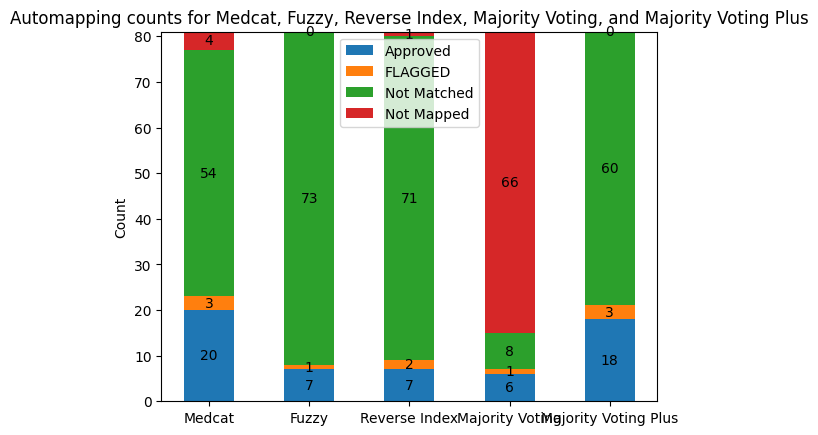

In [20]:
import matplotlib.pyplot as plt


labels = ['Medcat', 'Fuzzy', 'Reverse Index', 'Majority Voting', 'Majority Voting Plus']
approved = [
       mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED') & (mappedCancerFullDf.curatedConcept == mappedCancerFullDf.medcatConcept)].shape[0],
       mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED') & (mappedCancerFullDf.curatedConcept == mappedCancerFullDf.fuzzyConcept)].shape[0],
       mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED') & (mappedCancerFullDf.curatedConcept == mappedCancerFullDf.reverseIndexConcept)].shape[0],
       mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED') & (mappedCancerFullDf.curatedConcept == mappedCancerFullDf.majorityVoting)].shape[0],
       mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED') & (mappedCancerFullDf.curatedConcept == mappedCancerFullDf.majorityVotingPlus)].shape[0],
       ]
flagged = [
       mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'FLAGGED') & (mappedCancerFullDf.curatedConcept == mappedCancerFullDf.medcatConcept)].shape[0],
       mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'FLAGGED') & (mappedCancerFullDf.curatedConcept == mappedCancerFullDf.fuzzyConcept)].shape[0],
       mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'FLAGGED') & (mappedCancerFullDf.curatedConcept == mappedCancerFullDf.reverseIndexConcept)].shape[0],
       mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'FLAGGED') & (mappedCancerFullDf.curatedConcept == mappedCancerFullDf.majorityVoting)].shape[0],
       mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'FLAGGED') & (mappedCancerFullDf.curatedConcept == mappedCancerFullDf.majorityVotingPlus)].shape[0],
       ]
not_mapped = [
       (mappedCancerFullDf.shape[0] - mappedCancerFullDf.medcatConcept.notna().sum()),
       (mappedCancerFullDf.shape[0] - mappedCancerFullDf.fuzzyConcept.notna().sum()),
       (mappedCancerFullDf.shape[0] - mappedCancerFullDf.reverseIndexConcept.notna().sum()),
       (mappedCancerFullDf.shape[0] - mappedCancerFullDf.majorityVoting.notna().sum()),
       (mappedCancerFullDf.shape[0] - mappedCancerFullDf.majorityVotingPlus.notna().sum()),
       ]
not_matching = [
       mappedCancerFullDf[mappedCancerFullDf.medcatConcept.notna() & (mappedCancerFullDf.curatedConcept != mappedCancerFullDf.medcatConcept)].shape[0],
       mappedCancerFullDf[mappedCancerFullDf.fuzzyConcept.notna() & (mappedCancerFullDf.curatedConcept != mappedCancerFullDf.fuzzyConcept)].shape[0],
       mappedCancerFullDf[mappedCancerFullDf.reverseIndexConcept.notna() & (mappedCancerFullDf.curatedConcept != mappedCancerFullDf.reverseIndexConcept)].shape[0],
       mappedCancerFullDf[mappedCancerFullDf.majorityVoting.notna() & (mappedCancerFullDf.curatedConcept != mappedCancerFullDf.majorityVoting)].shape[0],
       mappedCancerFullDf[mappedCancerFullDf.majorityVotingPlus.notna() & (mappedCancerFullDf.curatedConcept != mappedCancerFullDf.majorityVotingPlus)].shape[0],
       ]
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

p1 = ax.bar(labels, approved, width, label='Approved')
p2 = ax.bar(labels, flagged, width, bottom=approved, label='FLAGGED')
p3 = ax.bar(labels, not_matching, width, bottom=[v + flagged[i] for i, v in enumerate(approved)], label='Not Matched')
p4 = ax.bar(labels, not_mapped, width, bottom=[a + f + not_matching[i] for i, (a, f) in enumerate(zip(approved, flagged))], label='Not Mapped')

ax.set_ylabel('Count')
ax.set_title('Automapping counts for Medcat, Fuzzy, Reverse Index, Majority Voting, and Majority Voting Plus')
ax.legend()

ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p3, label_type='center')
ax.bar_label(p4, label_type='center')

plt.show()

### Caclucate the semantic similarity scores

In [21]:
mappedCancerFullDf['semantic_similarity_score_curated'] = [calculateSemanticSimilarityScore(str(row['sourceName']), str(row['curatedConcept'])) for _, row in mappedCancerFullDf.iterrows()]
mappedCancerFullDf['semantic_similarity_score_medcat'] = [calculateSemanticSimilarityScore(str(row['sourceName']), str(row['medcatConcept'])) for _, row in mappedCancerFullDf.iterrows()]
mappedCancerFullDf['semantic_similarity_score_fuzzy'] = [calculateSemanticSimilarityScore(str(row['sourceName']), str(row['fuzzyConcept'])) for _, row in mappedCancerFullDf.iterrows()]
mappedCancerFullDf['semantic_similarity_score_reverse_index'] = [calculateSemanticSimilarityScore(str(row['sourceName']), str(row['reverseIndexConcept'])) for _, row in mappedCancerFullDf.iterrows()]
mappedCancerFullDf['semantic_similarity_score_majority_voting'] = [calculateSemanticSimilarityScore(str(row['sourceName']), str(row['majorityVoting'])) for _, row in mappedCancerFullDf.iterrows()]
mappedCancerFullDf['semantic_similarity_score_majority_voting_plus'] = [calculateSemanticSimilarityScore(str(row['sourceName']), str(row['majorityVotingPlus'])) for _, row in mappedCancerFullDf.iterrows()]
mappedCancerFullDf

,sourceName,sourceValueCode,curatedConcept,curatedStatus,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting,majorityVotingPlus,semantic_similarity_score_curated,semantic_similarity_score_medcat,semantic_similarity_score_fuzzy,semantic_similarity_score_reverse_index,semantic_similarity_score_majority_voting,semantic_similarity_score_majority_voting_plus
0,mesothelioma,1064,"Mesothelioma (malignant, clinical disorder)",APPROVED,"Mesothelioma, malignant",Medulloepithelioma,(Mesothelioma of lung) or ([X]mesothelioma of ...,NaN,"Mesothelioma, malignant",0.828614,0.881397,0.569226,0.694843,0.00000,0.881397
1,penis cancer,1046,Malignant tumor of penis,APPROVED,Malignant tumor of penis,Ca penis,Metastatic penile cancer,NaN,Metastatic penile cancer,0.738039,0.738039,0.666991,0.772745,0.00000,0.772745
2,non-hodgkins lymphoma,1053,Non-Hodgkin's lymphoma (clinical),APPROVED,NaN,B-cell non-Hodgkin's lymphoma,Diffuse non-Hodgkin's lymphoma,NaN,B-cell non-Hodgkin's lymphoma,0.858564,0.000000,0.875038,0.865422,0.00000,0.875038
3,trachea cancer,1080,Malignant tumor of trachea,APPROVED,Tracheal structure,Accessory trachea,(Neoplasms) or (cancers),NaN,Tracheal structure,0.824325,0.632941,0.608605,0.362333,0.00000,0.632941
4,multiple myeloma,1050,Multiple myeloma,APPROVED,Multiple myeloma,Multiple myeloma,Multiple myeloma,Multiple myeloma,Multiple myeloma,0.991530,0.991530,0.991530,0.991530,0.99153,0.991530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,respiratory / intrathoracic cancer,1084,Malignant neoplasm of respiratory system,FLAGGED,Structure of respiratory system,Expiratory concentration,Metastasis to respiratory AND/OR intrathoracic...,NaN,Metastasis to respiratory AND/OR intrathoracic...,0.679392,0.482468,0.358593,0.787529,0.00000,0.787529
77,metastatic cancer (unknown primary),1071,Malignant tumor of unknown origin,APPROVED,Metastatic to,Metastasis to bone of unknown primary,Metastatic penile cancer,NaN,Metastasis to bone of unknown primary,0.764180,0.524078,0.785560,0.517749,0.00000,0.785560
78,kidney/renal cell cancer,1034,Malignant tumor of kidney,FLAGGED,Kidney structure,Non-small cell lung cancer,Renal cell carcinoma of bilateral kidneys,NaN,Renal cell carcinoma of bilateral kidneys,0.701554,0.531360,0.488593,0.799661,0.00000,0.799661
79,small intestine/small bowel cancer,1019,Neoplasm of small intestine,FLAGGED,Small,Internal small bowel fistula,Finding of small intestine,NaN,Finding of small intestine,0.785745,0.190256,0.606614,0.715350,0.00000,0.715350


### Plot the average semantic similarity scores

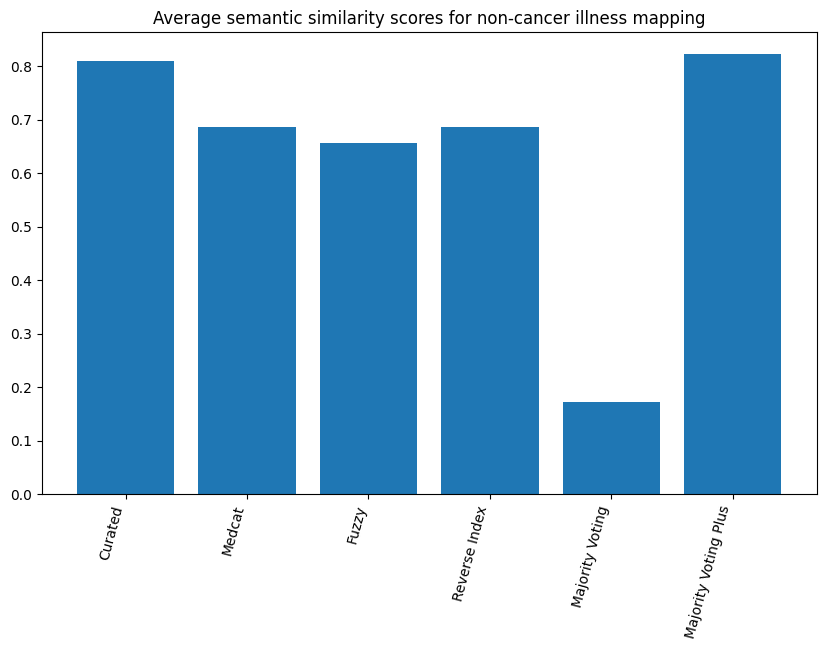

In [22]:
avg_semantic_similarity_score_curated = mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED') & (mappedCancerFullDf['curatedConcept'].notna())]['semantic_similarity_score_curated'].sum()/mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED')].shape[0]
avg_semantic_similarity_score_medcat = mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED') & (mappedCancerFullDf['medcatConcept'].notna())]['semantic_similarity_score_medcat'].sum()/mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED')].shape[0]
avg_semantic_similarity_score_fuzzy = mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED') & (mappedCancerFullDf['fuzzyConcept'].notna())]['semantic_similarity_score_fuzzy'].sum()/mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED')].shape[0]
avg_semantic_similarity_score_reverse_index = mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED') & (mappedCancerFullDf['reverseIndexConcept'].notna())]['semantic_similarity_score_reverse_index'].sum()/mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED')].shape[0]
avg_semantic_similarity_score_majority_voting = mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED') & (mappedCancerFullDf['majorityVoting'].notna())]['semantic_similarity_score_majority_voting'].sum()/mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED')].shape[0]
avg_semantic_similarity_score_majority_voting_plus = mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED') & (mappedCancerFullDf['majorityVotingPlus'].notna())]['semantic_similarity_score_majority_voting_plus'].sum()/mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED')].shape[0]

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    x=['Curated', 'Medcat', 'Fuzzy', 'Reverse Index', 'Majority Voting', 'Majority Voting Plus'],
    height=[
        avg_semantic_similarity_score_curated, avg_semantic_similarity_score_medcat, avg_semantic_similarity_score_fuzzy, avg_semantic_similarity_score_reverse_index, avg_semantic_similarity_score_majority_voting, avg_semantic_similarity_score_majority_voting_plus
        ],
    )
ax.set_title('Average semantic similarity scores for non-cancer illness mapping')
plt.xticks(rotation=75, ha='right')
plt.show()

## Operation

### Read standard concepts

In [23]:
import pandas as pd

athenaDf = pd.read_csv('data/CONCEPT.csv', sep='\t', dtype=str)
operationsDf = athenaDf[athenaDf.invalid_reason.isna() & (athenaDf.standard_concept == 'S') & (athenaDf.vocabulary_id == 'SNOMED') & (athenaDf.domain_id == 'Procedure') & (athenaDf.concept_class_id == 'Procedure')]
operationsDf

,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,valid_end_date,invalid_reason
2254913,42534812,Ultrasonography of calf of right lower leg,Procedure,SNOMED,Procedure,S,1001000087107,20180131,20991231,NaN
2254926,42534815,Right fluoroscopic retrograde pyelography,Procedure,SNOMED,Procedure,S,101000087107,20180131,20991231,NaN
2254929,37108565,Ultrasonography of left elbow,Procedure,SNOMED,Procedure,S,1011000087109,20170731,20991231,NaN
2254947,37108566,Ultrasonography of right elbow,Procedure,SNOMED,Procedure,S,1021000087101,20170731,20991231,NaN
2254970,37117086,Ultrasonography of left foot,Procedure,SNOMED,Procedure,S,1031000087104,20170731,20991231,NaN
...,...,...,...,...,...,...,...,...,...,...
3271637,3663244,Esophagogastroduodenoscopy gastric outlet redu...,Procedure,SNOMED,Procedure,S,870424001,20200731,20991231,NaN
3271638,3663245,Quantitative electroencephalogram,Procedure,SNOMED,Procedure,S,870425000,20200731,20991231,NaN
3271639,3663246,Angioplasty using paclitaxel coated balloon ca...,Procedure,SNOMED,Procedure,S,870426004,20200731,20991231,NaN
3271660,3663267,Sequential anastomosis of free right internal ...,Procedure,SNOMED,Procedure,S,871498004,20200731,20991231,NaN


### Read operations file

In [24]:
import pandas as pd

sourceOperationsDf = pd.read_csv('data/20004_operation.csv', dtype=str)
sourceOperationsDf = sourceOperationsDf[sourceOperationsDf.sourceName.notna()]
sourceOperationsDf

,sourceCode,sourceName,sourceValueCode,sourceValueName,sourceUnitName,sourceFrequency,sourceAutoAssignedConceptIds,matchScore,mappingStatus,statusSetBy,statusSetOn,conceptId,mappingType,comment,createdBy,createdOn
0,20004,scan / x-ray,1603,NaN,NaN,332,NaN,0.654131293296814,UNCHECKED,NaN,0,4178367,VALUE,NaN,NaN,1603436039043
1,20004,exercise ecg,1599,NaN,NaN,150,NaN,1.0,APPROVED,NaN,0,4261794,VALUE,NaN,NaN,1603436039045
2,20004,liver surgery,1450,NaN,NaN,435,NaN,0.7727025747299194,APPROVED,NaN,0,4171687,VALUE,NaN,NaN,1603436039047
3,20004,lymph node surgery,1537,NaN,NaN,1537,NaN,0.6767706274986267,APPROVED,NaN,0,4194197,VALUE,NaN,NaN,1603436039049
4,20004,bone marrow biopsy,1615,NaN,NaN,116,NaN,1.0,APPROVED,NaN,0,4120443,VALUE,NaN,NaN,1603436039051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,20004,pancreatic transplant,1457,NaN,NaN,7,NaN,1.0,APPROVED,NaN,0,4266668,VALUE,NaN,NaN,1603436039260
250,20004,amputation of toe,1442,NaN,NaN,506,NaN,1.0,APPROVED,NaN,0,4159766,VALUE,NaN,NaN,1603436039260
251,20004,amputation of leg,1440,NaN,NaN,240,NaN,1.0,APPROVED,NaN,0,4219032,VALUE,NaN,NaN,1603436039261
252,20004,endometrial ablation,1360,NaN,NaN,2851,NaN,1.0,APPROVED,NaN,0,4141940,VALUE,NaN,NaN,1603436039262


### Read operations mapped file

In [25]:
import pandas as pd

mappedOperationsDf = pd.read_csv('data/20004_operation_mapped_majority_voting.csv')
mappedOperationsDf

,Unnamed: 0,searchPhrase,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting,confidence
0,0,scan / x-ray,Radiographic imaging procedure,Scapula X-ray,Dual energy X-ray absorptiometry scan of wrist,Radiographic imaging procedure,Low
1,1,scan / x-ray,Radiographic imaging procedure,Scapula X-ray,Dual energy X-ray absorptiometry scan of wrist,Scapula X-ray,Low
2,2,scan / x-ray,Radiographic imaging procedure,Scapula X-ray,Dual energy X-ray absorptiometry scan of wrist,Dual energy X-ray absorptiometry scan of wrist,Low
3,3,exercise ecg,Electrocardiogram with exercise test,Exercise challenge,Stress ECG,Electrocardiogram with exercise test,Low
4,4,exercise ecg,Electrocardiogram with exercise test,Exercise challenge,Stress ECG,Exercise challenge,Low
...,...,...,...,...,...,...,...
635,635,amputation of leg,Amputation of lower limb,Amputation of leg,Amputation of leg,Amputation of leg,Medium
636,636,amputation of leg,Amputation of lower limb,Amputation of leg,Amputation of leg,Amputation of lower limb,Low
637,637,endometrial ablation,Endometrial ablation,Endometrial ablation,Endometrial ablation,Endometrial ablation,High
638,638,heart transplant,Transplantation of heart,Heart transplant,Heart transplant,Heart transplant,Medium


In [26]:
mappedOperationsMedcatDf = mappedOperationsDf[mappedOperationsDf.medcatConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'medcatConcept'].agg(['unique'])
mappedOperationsMedcatDf.reset_index(drop = True, inplace = True)
mappedOperationsMedcatDf.columns = mappedOperationsMedcatDf.columns.droplevel(1)
mappedOperationsMedcatDf.medcatConcept = mappedOperationsMedcatDf.medcatConcept.apply(lambda x: x[0])
mappedOperationsMedcatDf.searchPhrase = mappedOperationsMedcatDf.searchPhrase.apply(lambda x: str(x[0]))
mappedOperationsFuzzyDf = mappedOperationsDf[mappedOperationsDf.fuzzyConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'fuzzyConcept'].agg(['unique'])
mappedOperationsFuzzyDf.reset_index(drop = True, inplace = True)
mappedOperationsFuzzyDf.columns = mappedOperationsFuzzyDf.columns.droplevel(1)
mappedOperationsFuzzyDf.fuzzyConcept = mappedOperationsFuzzyDf.fuzzyConcept.apply(lambda x: x[0])
mappedOperationsFuzzyDf.searchPhrase = mappedOperationsFuzzyDf.searchPhrase.apply(lambda x: str(x[0]))
mappedOperationsReverseIndexDf = mappedOperationsDf[mappedOperationsDf.reverseIndexConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'reverseIndexConcept'].agg(['unique'])
mappedOperationsReverseIndexDf.reset_index(drop = True, inplace = True)
mappedOperationsReverseIndexDf.columns = mappedOperationsReverseIndexDf.columns.droplevel(1)
mappedOperationsReverseIndexDf.reverseIndexConcept = mappedOperationsReverseIndexDf.reverseIndexConcept.apply(lambda x: x[0])
mappedOperationsReverseIndexDf.searchPhrase = mappedOperationsReverseIndexDf.searchPhrase.apply(lambda x: str(x[0]))
mappedOperationsMajorityVotingDf = mappedOperationsDf[mappedOperationsDf.majorityVoting.notna() & mappedOperationsDf.confidence.isin(['Medium', 'High'])].groupby(['searchPhrase'])['searchPhrase', 'majorityVoting'].agg(['unique'])
mappedOperationsMajorityVotingDf.reset_index(drop = True, inplace = True)
mappedOperationsMajorityVotingDf.columns = mappedOperationsMajorityVotingDf.columns.droplevel(1)
mappedOperationsMajorityVotingDf.majorityVoting = mappedOperationsMajorityVotingDf.majorityVoting.apply(lambda x: x[0])
mappedOperationsMajorityVotingDf.searchPhrase = mappedOperationsMajorityVotingDf.searchPhrase.apply(lambda x: str(x[0]))

/tmp/ipykernel_1253201/2921637815.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mappedOperationsMedcatDf = mappedOperationsDf[mappedOperationsDf.medcatConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'medcatConcept'].agg(['unique'])
/tmp/ipykernel_1253201/2921637815.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mappedOperationsFuzzyDf = mappedOperationsDf[mappedOperationsDf.fuzzyConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'fuzzyConcept'].agg(['unique'])
/tmp/ipykernel_1253201/2921637815.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mappedOperationsReverseIndexDf = mappedOperationsDf[mappedOperationsDf.reverseIndexConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'reverseIndexConcept'].agg(['uniq

In [27]:
mappedOperationsCuratedDf = sourceOperationsDf\
    .merge(operationsDf, how='left', left_on='conceptId', right_on='concept_id')[['sourceName', 'sourceValueCode', 'concept_name', 'mappingStatus']]
mappedOperationsCuratedDf = mappedOperationsCuratedDf.rename(columns={'concept_name': 'curatedConcept', 'mappingStatus': 'curatedStatus'})
mappedOperationsCuratedDf

,sourceName,sourceValueCode,curatedConcept,curatedStatus
0,scan / x-ray,1603,Radiographic imaging procedure,UNCHECKED
1,exercise ecg,1599,Electrocardiogram with exercise test,APPROVED
2,liver surgery,1450,Operation on liver,APPROVED
3,lymph node surgery,1537,Operation on lymph node,APPROVED
4,bone marrow biopsy,1615,Bone marrow sampling,APPROVED
...,...,...,...,...
248,pancreatic transplant,1457,Transplantation of pancreas,APPROVED
249,amputation of toe,1442,Amputation of toe,APPROVED
250,amputation of leg,1440,Amputation of lower limb,APPROVED
251,endometrial ablation,1360,Endometrial ablation,APPROVED


In [28]:
# pd.concat([mappedOperationsCuratedDf, mappedOperationsFuzzyDf], keys=['sourceValueCode', 'id'])
mappedOperationsFullDf = mappedOperationsCuratedDf\
    .merge(mappedOperationsMedcatDf, how='left', left_on='sourceName', right_on='searchPhrase').drop(columns=['searchPhrase'])\
        .merge(mappedOperationsFuzzyDf, how='left', left_on='sourceName', right_on='searchPhrase').drop(columns=['searchPhrase'])\
            .merge(mappedOperationsReverseIndexDf, how='left', left_on='sourceName', right_on='searchPhrase').drop(columns=['searchPhrase'])\
                .merge(mappedOperationsMajorityVotingDf, how='left', left_on='sourceName', right_on='searchPhrase').drop(columns=['searchPhrase'])
mappedOperationsFullDf

,sourceName,sourceValueCode,curatedConcept,curatedStatus,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting
0,scan / x-ray,1603,Radiographic imaging procedure,UNCHECKED,Radiographic imaging procedure,Scapula X-ray,Dual energy X-ray absorptiometry scan of wrist,NaN
1,exercise ecg,1599,Electrocardiogram with exercise test,APPROVED,Electrocardiogram with exercise test,Exercise challenge,Stress ECG,NaN
2,liver surgery,1450,Operation on liver,APPROVED,Operation on liver,Laser surgery,Radioimmunoguided surgery,NaN
3,lymph node surgery,1537,Operation on lymph node,APPROVED,Structure of lymph node,Procedure on lymph node,Excision of inguinal lymph node and pelvic lym...,NaN
4,bone marrow biopsy,1615,Bone marrow sampling,APPROVED,Bone marrow sampling,Biopsy of bone,Bone marrow biopsy (& non-surgical),NaN
...,...,...,...,...,...,...,...,...
248,pancreatic transplant,1457,Transplantation of pancreas,APPROVED,Transplantation of pancreas,Pancreatic transplant,Pancreatic transplant,Pancreatic transplant
249,amputation of toe,1442,Amputation of toe,APPROVED,Amputation of toe,Amputation of toe,Amputation of toe,Amputation of toe
250,amputation of leg,1440,Amputation of lower limb,APPROVED,Amputation of lower limb,Amputation of leg,Amputation of leg,Amputation of leg
251,endometrial ablation,1360,Endometrial ablation,APPROVED,Endometrial ablation,Endometrial ablation,Endometrial ablation,Endometrial ablation


In [29]:
mappedOperationsFullDf['majorityVotingPlus'] = mappedOperationsFullDf.majorityVoting
mappedOperationsFullDf.loc[mappedOperationsFullDf.majorityVoting.isna(), 'majorityVotingPlus'] = mappedOperationsFullDf[mappedOperationsFullDf.majorityVoting.isna()].apply(func=getMaxConcept, axis=1)
mappedOperationsFullDf

,sourceName,sourceValueCode,curatedConcept,curatedStatus,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting,majorityVotingPlus
0,scan / x-ray,1603,Radiographic imaging procedure,UNCHECKED,Radiographic imaging procedure,Scapula X-ray,Dual energy X-ray absorptiometry scan of wrist,NaN,Radiographic imaging procedure
1,exercise ecg,1599,Electrocardiogram with exercise test,APPROVED,Electrocardiogram with exercise test,Exercise challenge,Stress ECG,NaN,Exercise challenge
2,liver surgery,1450,Operation on liver,APPROVED,Operation on liver,Laser surgery,Radioimmunoguided surgery,NaN,Operation on liver
3,lymph node surgery,1537,Operation on lymph node,APPROVED,Structure of lymph node,Procedure on lymph node,Excision of inguinal lymph node and pelvic lym...,NaN,Procedure on lymph node
4,bone marrow biopsy,1615,Bone marrow sampling,APPROVED,Bone marrow sampling,Biopsy of bone,Bone marrow biopsy (& non-surgical),NaN,Bone marrow sampling
...,...,...,...,...,...,...,...,...,...
248,pancreatic transplant,1457,Transplantation of pancreas,APPROVED,Transplantation of pancreas,Pancreatic transplant,Pancreatic transplant,Pancreatic transplant,Pancreatic transplant
249,amputation of toe,1442,Amputation of toe,APPROVED,Amputation of toe,Amputation of toe,Amputation of toe,Amputation of toe,Amputation of toe
250,amputation of leg,1440,Amputation of lower limb,APPROVED,Amputation of lower limb,Amputation of leg,Amputation of leg,Amputation of leg,Amputation of leg
251,endometrial ablation,1360,Endometrial ablation,APPROVED,Endometrial ablation,Endometrial ablation,Endometrial ablation,Endometrial ablation,Endometrial ablation


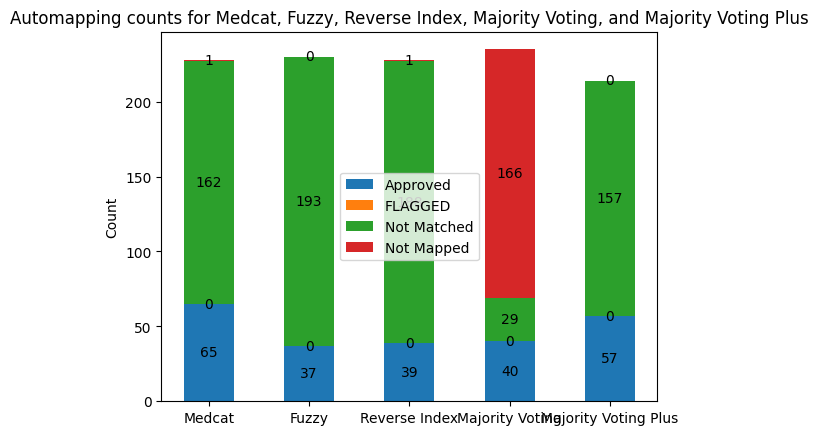

In [30]:
import matplotlib.pyplot as plt


labels = ['Medcat', 'Fuzzy', 'Reverse Index', 'Majority Voting', 'Majority Voting Plus']
approved = [
       mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED') & (mappedOperationsFullDf.curatedConcept == mappedOperationsFullDf.medcatConcept)].shape[0],
       mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED') & (mappedOperationsFullDf.curatedConcept == mappedOperationsFullDf.fuzzyConcept)].shape[0],
       mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED') & (mappedOperationsFullDf.curatedConcept == mappedOperationsFullDf.reverseIndexConcept)].shape[0],
       mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED') & (mappedOperationsFullDf.curatedConcept == mappedOperationsFullDf.majorityVoting)].shape[0],
       mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED') & (mappedOperationsFullDf.curatedConcept == mappedOperationsFullDf.majorityVotingPlus)].shape[0],
       ]
flagged = [
       mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'FLAGGED') & (mappedOperationsFullDf.curatedConcept == mappedOperationsFullDf.medcatConcept)].shape[0],
       mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'FLAGGED') & (mappedOperationsFullDf.curatedConcept == mappedOperationsFullDf.fuzzyConcept)].shape[0],
       mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'FLAGGED') & (mappedOperationsFullDf.curatedConcept == mappedOperationsFullDf.reverseIndexConcept)].shape[0],
       mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'FLAGGED') & (mappedOperationsFullDf.curatedConcept == mappedOperationsFullDf.majorityVoting)].shape[0],
       mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'FLAGGED') & (mappedOperationsFullDf.curatedConcept == mappedOperationsFullDf.majorityVotingPlus)].shape[0],
       ]
not_mapped = [
       (mappedOperationsFullDf.shape[0] - mappedOperationsFullDf.medcatConcept.notna().sum()),
       (mappedOperationsFullDf.shape[0] - mappedOperationsFullDf.fuzzyConcept.notna().sum()),
       (mappedOperationsFullDf.shape[0] - mappedOperationsFullDf.reverseIndexConcept.notna().sum()),
       (mappedOperationsFullDf.shape[0] - mappedOperationsFullDf.majorityVoting.notna().sum()),
       (mappedOperationsFullDf.shape[0] - mappedOperationsFullDf.majorityVotingPlus.notna().sum()),
       ]
not_matching = [
       mappedOperationsFullDf[mappedOperationsFullDf.medcatConcept.notna() & (mappedOperationsFullDf.curatedConcept != mappedOperationsFullDf.medcatConcept)].shape[0],
       mappedOperationsFullDf[mappedOperationsFullDf.fuzzyConcept.notna() & (mappedOperationsFullDf.curatedConcept != mappedOperationsFullDf.fuzzyConcept)].shape[0],
       mappedOperationsFullDf[mappedOperationsFullDf.reverseIndexConcept.notna() & (mappedOperationsFullDf.curatedConcept != mappedOperationsFullDf.reverseIndexConcept)].shape[0],
       mappedOperationsFullDf[mappedOperationsFullDf.majorityVoting.notna() & (mappedOperationsFullDf.curatedConcept != mappedOperationsFullDf.majorityVoting)].shape[0],
       mappedOperationsFullDf[mappedOperationsFullDf.majorityVotingPlus.notna() & (mappedOperationsFullDf.curatedConcept != mappedOperationsFullDf.majorityVotingPlus)].shape[0],
       ]
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

p1 = ax.bar(labels, approved, width, label='Approved')
p2 = ax.bar(labels, flagged, width, bottom=approved, label='FLAGGED')
p3 = ax.bar(labels, not_matching, width, bottom=[v + flagged[i] for i, v in enumerate(approved)], label='Not Matched')
p4 = ax.bar(labels, not_mapped, width, bottom=[a + f + not_matching[i] for i, (a, f) in enumerate(zip(approved, flagged))], label='Not Mapped')

ax.set_ylabel('Count')
ax.set_title('Automapping counts for Medcat, Fuzzy, Reverse Index, Majority Voting, and Majority Voting Plus')
ax.legend()

ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p3, label_type='center')
ax.bar_label(p4, label_type='center')

plt.show()

### Caclucate the semantic similarity scores

In [31]:
mappedOperationsFullDf['semantic_similarity_score_curated'] = [calculateSemanticSimilarityScore(str(row['sourceName']), str(row['curatedConcept'])) for _, row in mappedOperationsFullDf.iterrows()]
mappedOperationsFullDf['semantic_similarity_score_medcat'] = [calculateSemanticSimilarityScore(str(row['sourceName']), str(row['medcatConcept'])) for _, row in mappedOperationsFullDf.iterrows()]
mappedOperationsFullDf['semantic_similarity_score_fuzzy'] = [calculateSemanticSimilarityScore(str(row['sourceName']), str(row['fuzzyConcept'])) for _, row in mappedOperationsFullDf.iterrows()]
mappedOperationsFullDf['semantic_similarity_score_reverse_index'] = [calculateSemanticSimilarityScore(str(row['sourceName']), str(row['reverseIndexConcept'])) for _, row in mappedOperationsFullDf.iterrows()]
mappedOperationsFullDf['semantic_similarity_score_majority_voting'] = [calculateSemanticSimilarityScore(str(row['sourceName']), str(row['majorityVoting'])) for _, row in mappedOperationsFullDf.iterrows()]
mappedOperationsFullDf['semantic_similarity_score_majority_voting_plus'] = [calculateSemanticSimilarityScore(str(row['sourceName']), str(row['majorityVotingPlus'])) for _, row in mappedOperationsFullDf.iterrows()]
mappedOperationsFullDf

,sourceName,sourceValueCode,curatedConcept,curatedStatus,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting,majorityVotingPlus,semantic_similarity_score_curated,semantic_similarity_score_medcat,semantic_similarity_score_fuzzy,semantic_similarity_score_reverse_index,semantic_similarity_score_majority_voting,semantic_similarity_score_majority_voting_plus
0,scan / x-ray,1603,Radiographic imaging procedure,UNCHECKED,Radiographic imaging procedure,Scapula X-ray,Dual energy X-ray absorptiometry scan of wrist,NaN,Radiographic imaging procedure,0.587903,0.587903,0.467270,0.567664,0.000000,0.587903
1,exercise ecg,1599,Electrocardiogram with exercise test,APPROVED,Electrocardiogram with exercise test,Exercise challenge,Stress ECG,NaN,Exercise challenge,0.581393,0.581393,0.753096,0.270222,0.000000,0.753096
2,liver surgery,1450,Operation on liver,APPROVED,Operation on liver,Laser surgery,Radioimmunoguided surgery,NaN,Operation on liver,0.887500,0.887500,0.556058,0.235350,0.000000,0.887500
3,lymph node surgery,1537,Operation on lymph node,APPROVED,Structure of lymph node,Procedure on lymph node,Excision of inguinal lymph node and pelvic lym...,NaN,Procedure on lymph node,0.901899,0.750324,0.818269,0.687923,0.000000,0.818269
4,bone marrow biopsy,1615,Bone marrow sampling,APPROVED,Bone marrow sampling,Biopsy of bone,Bone marrow biopsy (& non-surgical),NaN,Bone marrow sampling,0.874887,0.874887,0.727412,0.757455,0.000000,0.874887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,pancreatic transplant,1457,Transplantation of pancreas,APPROVED,Transplantation of pancreas,Pancreatic transplant,Pancreatic transplant,Pancreatic transplant,Pancreatic transplant,0.890936,0.890936,0.982337,0.982337,0.982337,0.982337
249,amputation of toe,1442,Amputation of toe,APPROVED,Amputation of toe,Amputation of toe,Amputation of toe,Amputation of toe,Amputation of toe,0.989505,0.989505,0.989505,0.989505,0.989505,0.989505
250,amputation of leg,1440,Amputation of lower limb,APPROVED,Amputation of lower limb,Amputation of leg,Amputation of leg,Amputation of leg,Amputation of leg,0.849529,0.849529,0.987297,0.987297,0.987297,0.987297
251,endometrial ablation,1360,Endometrial ablation,APPROVED,Endometrial ablation,Endometrial ablation,Endometrial ablation,Endometrial ablation,Endometrial ablation,0.983629,0.983629,0.983629,0.983629,0.983629,0.983629


### Plot the average semantic similarity scores

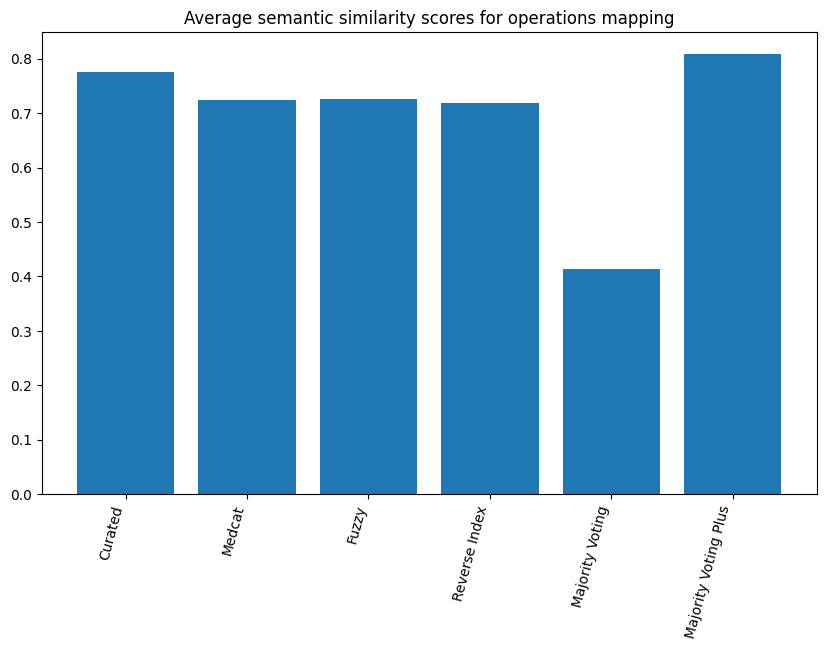

In [32]:
avg_semantic_similarity_score_curated = mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED') & (mappedOperationsFullDf['curatedConcept'].notna())]['semantic_similarity_score_curated'].sum()/mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED')].shape[0]
avg_semantic_similarity_score_medcat = mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED') & (mappedOperationsFullDf['medcatConcept'].notna())]['semantic_similarity_score_medcat'].sum()/mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED')].shape[0]
avg_semantic_similarity_score_fuzzy = mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED') & (mappedOperationsFullDf['fuzzyConcept'].notna())]['semantic_similarity_score_fuzzy'].sum()/mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED')].shape[0]
avg_semantic_similarity_score_reverse_index = mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED') & (mappedOperationsFullDf['reverseIndexConcept'].notna())]['semantic_similarity_score_reverse_index'].sum()/mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED')].shape[0]
avg_semantic_similarity_score_majority_voting = mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED') & (mappedOperationsFullDf['majorityVoting'].notna())]['semantic_similarity_score_majority_voting'].sum()/mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED')].shape[0]
avg_semantic_similarity_score_majority_voting_plus = mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED') & (mappedOperationsFullDf['majorityVotingPlus'].notna())]['semantic_similarity_score_majority_voting_plus'].sum()/mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED')].shape[0]

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    x=['Curated', 'Medcat', 'Fuzzy', 'Reverse Index', 'Majority Voting', 'Majority Voting Plus'],
    height=[
        avg_semantic_similarity_score_curated, avg_semantic_similarity_score_medcat, avg_semantic_similarity_score_fuzzy, avg_semantic_similarity_score_reverse_index, avg_semantic_similarity_score_majority_voting, avg_semantic_similarity_score_majority_voting_plus
        ],
    )
ax.set_title('Average semantic similarity scores for operations mapping')
plt.xticks(rotation=75, ha='right')
plt.show()

## Summary plots

### Semantic similarity comparison plot grouped by algorithm

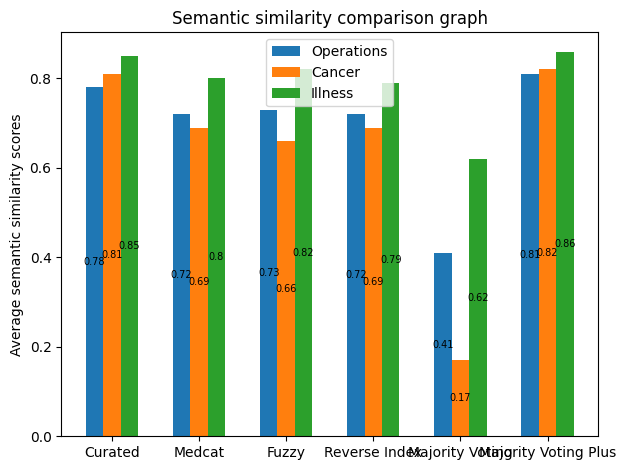

In [33]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Curated', 'Medcat', 'Fuzzy', 'Reverse Index', 'Majority Voting', 'Majority Voting Plus']

avg_operations_sss_curated = round(mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED') & (mappedOperationsFullDf['curatedConcept'].notna())]['semantic_similarity_score_curated'].sum()/mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_operations_sss_medcat = round(mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED') & (mappedOperationsFullDf['medcatConcept'].notna())]['semantic_similarity_score_medcat'].sum()/mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_operations_sss_fuzzy = round(mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED') & (mappedOperationsFullDf['fuzzyConcept'].notna())]['semantic_similarity_score_fuzzy'].sum()/mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_operations_sss_reverse_index = round(mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED') & (mappedOperationsFullDf['reverseIndexConcept'].notna())]['semantic_similarity_score_reverse_index'].sum()/mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_operations_sss_majority_voting = round(mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED') & (mappedOperationsFullDf['majorityVoting'].notna())]['semantic_similarity_score_majority_voting'].sum()/mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_operations_sss_majority_voting_plus = round(mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED') & (mappedOperationsFullDf['majorityVotingPlus'].notna())]['semantic_similarity_score_majority_voting_plus'].sum()/mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_operations_sss = [avg_operations_sss_curated, avg_operations_sss_medcat, avg_operations_sss_fuzzy, avg_operations_sss_reverse_index, avg_operations_sss_majority_voting, avg_operations_sss_majority_voting_plus]

avg_cancer_sss_curated = round(mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED') & (mappedCancerFullDf['curatedConcept'].notna())]['semantic_similarity_score_curated'].sum()/mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_cancer_sss_medcat = round(mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED') & (mappedCancerFullDf['medcatConcept'].notna())]['semantic_similarity_score_medcat'].sum()/mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_cancer_sss_fuzzy = round(mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED') & (mappedCancerFullDf['fuzzyConcept'].notna())]['semantic_similarity_score_fuzzy'].sum()/mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_cancer_sss_reverse_index = round(mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED') & (mappedCancerFullDf['reverseIndexConcept'].notna())]['semantic_similarity_score_reverse_index'].sum()/mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_cancer_sss_majority_voting = round(mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED') & (mappedCancerFullDf['majorityVoting'].notna())]['semantic_similarity_score_majority_voting'].sum()/mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_cancer_sss_majority_voting_plus = round(mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED') & (mappedCancerFullDf['majorityVotingPlus'].notna())]['semantic_similarity_score_majority_voting_plus'].sum()/mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_cancer_sss = [avg_cancer_sss_curated, avg_cancer_sss_medcat, avg_cancer_sss_fuzzy, avg_cancer_sss_reverse_index, avg_cancer_sss_majority_voting, avg_cancer_sss_majority_voting_plus]

avg_illness_sss_curated = round(mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED') & (mappedIllnessFullDf['curatedConcept'].notna())]['semantic_similarity_score_curated'].sum()/mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_illness_sss_medcat = round(mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED') & (mappedIllnessFullDf['medcatConcept'].notna())]['semantic_similarity_score_medcat'].sum()/mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_illness_sss_fuzzy = round(mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED') & (mappedIllnessFullDf['fuzzyConcept'].notna())]['semantic_similarity_score_fuzzy'].sum()/mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_illness_sss_reverse_index = round(mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED') & (mappedIllnessFullDf['reverseIndexConcept'].notna())]['semantic_similarity_score_reverse_index'].sum()/mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_illness_sss_majority_voting = round(mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED') & (mappedIllnessFullDf['majorityVoting'].notna())]['semantic_similarity_score_majority_voting'].sum()/mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_illness_sss_majority_voting_plus = round(mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED') & (mappedIllnessFullDf['majorityVotingPlus'].notna())]['semantic_similarity_score_majority_voting_plus'].sum()/mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_illness_sss = [avg_illness_sss_curated, avg_illness_sss_medcat, avg_illness_sss_fuzzy, avg_illness_sss_reverse_index, avg_illness_sss_majority_voting, avg_illness_sss_majority_voting_plus]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, avg_operations_sss, width, label='Operations')
rects2 = ax.bar(x, avg_cancer_sss, width, label='Cancer')
rects3 = ax.bar(x + width, avg_illness_sss, width, label='Illness')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average semantic similarity scores')
ax.set_title('Semantic similarity comparison graph')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, label_type='center', fontsize=7)
ax.bar_label(rects2, label_type='center', fontsize=7)
ax.bar_label(rects3, label_type='center', fontsize=7)

fig.tight_layout()

plt.show()


### Semantic similarity comparison plot grouped by concept type

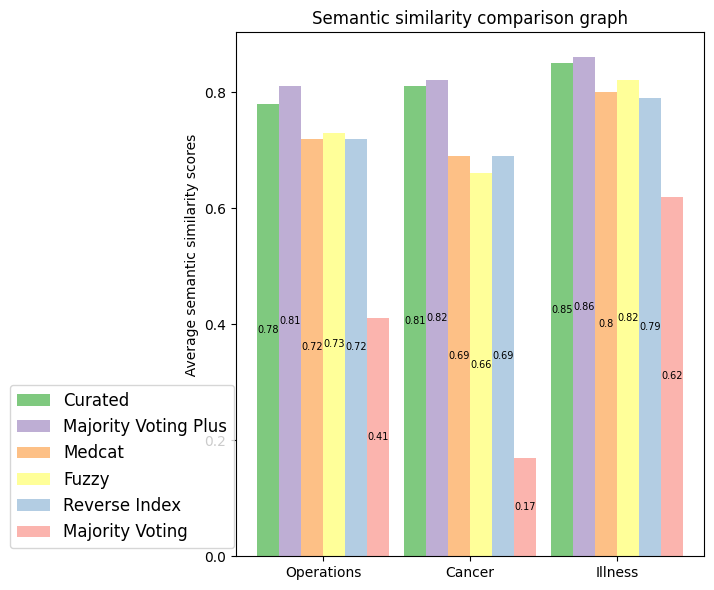

In [34]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Operations', 'Cancer', 'Illness']

avg_operations_sss_curated = round(mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED') & (mappedOperationsFullDf['curatedConcept'].notna())]['semantic_similarity_score_curated'].sum()/mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_cancer_sss_curated = round(mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED') & (mappedCancerFullDf['curatedConcept'].notna())]['semantic_similarity_score_curated'].sum()/mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_illness_sss_curated = round(mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED') & (mappedIllnessFullDf['curatedConcept'].notna())]['semantic_similarity_score_curated'].sum()/mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_curated_sss = [avg_operations_sss_curated, avg_cancer_sss_curated, avg_illness_sss_curated]

avg_operations_sss_medcat = round(mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED') & (mappedOperationsFullDf['medcatConcept'].notna())]['semantic_similarity_score_medcat'].sum()/mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_cancer_sss_medcat = round(mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED') & (mappedCancerFullDf['medcatConcept'].notna())]['semantic_similarity_score_medcat'].sum()/mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_illness_sss_medcat = round(mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED') & (mappedIllnessFullDf['medcatConcept'].notna())]['semantic_similarity_score_medcat'].sum()/mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_medcat_sss = [avg_operations_sss_medcat, avg_cancer_sss_medcat, avg_illness_sss_medcat]

avg_operations_sss_fuzzy = round(mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED') & (mappedOperationsFullDf['fuzzyConcept'].notna())]['semantic_similarity_score_fuzzy'].sum()/mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_cancer_sss_fuzzy = round(mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED') & (mappedCancerFullDf['fuzzyConcept'].notna())]['semantic_similarity_score_fuzzy'].sum()/mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_illness_sss_fuzzy = round(mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED') & (mappedIllnessFullDf['fuzzyConcept'].notna())]['semantic_similarity_score_fuzzy'].sum()/mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_fuzzy_sss = [avg_operations_sss_fuzzy, avg_cancer_sss_fuzzy, avg_illness_sss_fuzzy]

avg_operations_sss_reverse_index = round(mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED') & (mappedOperationsFullDf['reverseIndexConcept'].notna())]['semantic_similarity_score_reverse_index'].sum()/mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_cancer_sss_reverse_index = round(mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED') & (mappedCancerFullDf['reverseIndexConcept'].notna())]['semantic_similarity_score_reverse_index'].sum()/mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_illness_sss_reverse_index = round(mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED') & (mappedIllnessFullDf['reverseIndexConcept'].notna())]['semantic_similarity_score_reverse_index'].sum()/mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_reverse_index_sss = [avg_operations_sss_reverse_index, avg_cancer_sss_reverse_index, avg_illness_sss_reverse_index]

avg_operations_sss_majority_voting = round(mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED') & (mappedOperationsFullDf['majorityVoting'].notna())]['semantic_similarity_score_majority_voting'].sum()/mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_cancer_sss_majority_voting = round(mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED') & (mappedCancerFullDf['majorityVoting'].notna())]['semantic_similarity_score_majority_voting'].sum()/mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_illness_sss_majority_voting = round(mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED') & (mappedIllnessFullDf['majorityVoting'].notna())]['semantic_similarity_score_majority_voting'].sum()/mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_majority_voting_sss = [avg_operations_sss_majority_voting, avg_cancer_sss_majority_voting, avg_illness_sss_majority_voting]

avg_operations_sss_majority_voting_plus = round(mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED') & (mappedOperationsFullDf['majorityVotingPlus'].notna())]['semantic_similarity_score_majority_voting_plus'].sum()/mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_cancer_sss_majority_voting_plus = round(mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED') & (mappedCancerFullDf['majorityVotingPlus'].notna())]['semantic_similarity_score_majority_voting_plus'].sum()/mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_illness_sss_majority_voting_plus = round(mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED') & (mappedIllnessFullDf['majorityVotingPlus'].notna())]['semantic_similarity_score_majority_voting_plus'].sum()/mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED')].shape[0], 2)
avg_majority_voting_plus_sss = [avg_operations_sss_majority_voting_plus, avg_cancer_sss_majority_voting_plus, avg_illness_sss_majority_voting_plus]


x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - (5/2) * width, avg_curated_sss, width, label='Curated', color='#7fc97f')
rects2 = ax.bar(x - (3/2) * width, avg_majority_voting_plus_sss, width, label='Majority Voting Plus', color='#beaed4')
rects3 = ax.bar(x - (1/2) * width, avg_medcat_sss, width, label='Medcat', color='#fdc086')
rects4 = ax.bar(x + (1/2) * width, avg_fuzzy_sss, width, label='Fuzzy', color='#ffff99')
rects5 = ax.bar(x + (3/2) * width, avg_reverse_index_sss, width, label='Reverse Index', color='#b3cde3')
rects6 = ax.bar(x + (5/2) * width, avg_majority_voting_sss, width, label='Majority Voting', color='#fbb4ae')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('                  Average semantic similarity scores')
ax.set_title('Semantic similarity comparison graph')
ax.set_xticks(x, labels)
ax.legend(bbox_to_anchor=(-0.5, 0), fontsize=12, loc='lower left')


ax.bar_label(rects1, label_type='center', fontsize=7)
ax.bar_label(rects2, label_type='center', fontsize=7)
ax.bar_label(rects3, label_type='center', fontsize=7)
ax.bar_label(rects4, label_type='center', fontsize=7)
ax.bar_label(rects5, label_type='center', fontsize=7)
ax.bar_label(rects6, label_type='center', fontsize=7)

fig.tight_layout()

plt.show()

### Mapping coverage comparison plot

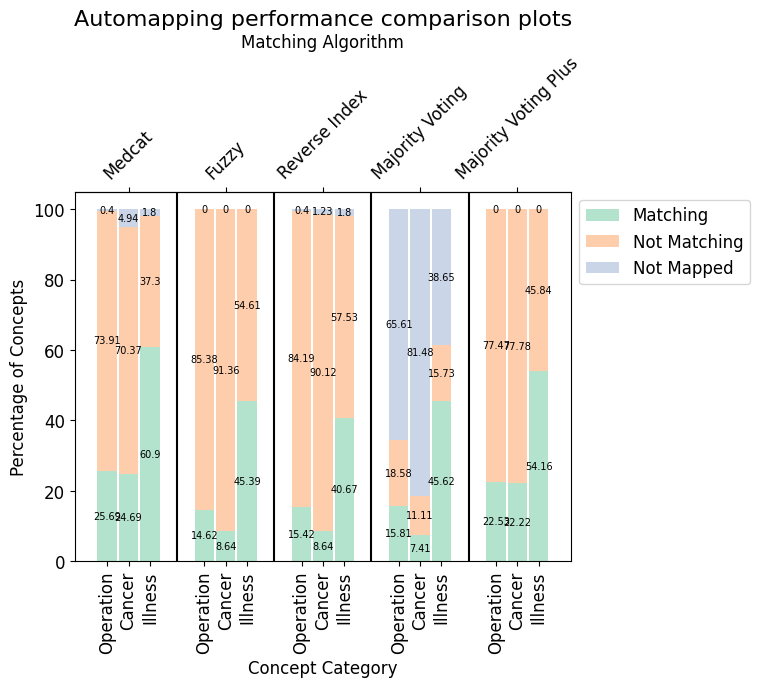

In [35]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Medcat', 'Fuzzy', 'Reverse Index', 'Majority Voting', 'Majority Voting Plus']

operations_matching = np.array([
       round((mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED') & (mappedOperationsFullDf.curatedConcept == mappedOperationsFullDf.medcatConcept)].shape[0])/mappedOperationsFullDf.shape[0] * 100, 2),
       round((mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED') & (mappedOperationsFullDf.curatedConcept == mappedOperationsFullDf.fuzzyConcept)].shape[0])/mappedOperationsFullDf.shape[0] * 100, 2),
       round((mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED') & (mappedOperationsFullDf.curatedConcept == mappedOperationsFullDf.reverseIndexConcept)].shape[0])/mappedOperationsFullDf.shape[0] * 100, 2),
       round((mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED') & (mappedOperationsFullDf.curatedConcept == mappedOperationsFullDf.majorityVoting)].shape[0])/mappedOperationsFullDf.shape[0] * 100, 2),
       round((mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'APPROVED') & (mappedOperationsFullDf.curatedConcept == mappedOperationsFullDf.majorityVotingPlus)].shape[0])/mappedOperationsFullDf.shape[0] * 100, 2),
       ])

operations_not_matching = np.array([
       round((mappedOperationsFullDf[mappedOperationsFullDf.medcatConcept.notna() & (mappedOperationsFullDf.curatedConcept != mappedOperationsFullDf.medcatConcept)].shape[0] + mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'FLAGGED') & (mappedOperationsFullDf.curatedConcept == mappedOperationsFullDf.medcatConcept)].shape[0] + mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'UNCHECKED') & (mappedOperationsFullDf.curatedConcept == mappedOperationsFullDf.medcatConcept)].shape[0])/mappedOperationsFullDf.shape[0] * 100, 2),
       round((mappedOperationsFullDf[mappedOperationsFullDf.fuzzyConcept.notna() & (mappedOperationsFullDf.curatedConcept != mappedOperationsFullDf.fuzzyConcept)].shape[0] + mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'FLAGGED') & (mappedOperationsFullDf.curatedConcept == mappedOperationsFullDf.fuzzyConcept)].shape[0] + mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'UNCHECKED') & (mappedOperationsFullDf.curatedConcept == mappedOperationsFullDf.fuzzyConcept)].shape[0])/mappedOperationsFullDf.shape[0] * 100, 2),
       round((mappedOperationsFullDf[mappedOperationsFullDf.reverseIndexConcept.notna() & (mappedOperationsFullDf.curatedConcept != mappedOperationsFullDf.reverseIndexConcept)].shape[0] + mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'FLAGGED') & (mappedOperationsFullDf.curatedConcept == mappedOperationsFullDf.reverseIndexConcept)].shape[0] + mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'UNCHECKED') & (mappedOperationsFullDf.curatedConcept == mappedOperationsFullDf.reverseIndexConcept)].shape[0])/mappedOperationsFullDf.shape[0] * 100, 2),
       round((mappedOperationsFullDf[mappedOperationsFullDf.majorityVoting.notna() & (mappedOperationsFullDf.curatedConcept != mappedOperationsFullDf.majorityVoting)].shape[0] + mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'FLAGGED') & (mappedOperationsFullDf.curatedConcept == mappedOperationsFullDf.majorityVoting)].shape[0] + mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'UNCHECKED') & (mappedOperationsFullDf.curatedConcept == mappedOperationsFullDf.majorityVoting)].shape[0])/mappedOperationsFullDf.shape[0] * 100, 2),
       round((mappedOperationsFullDf[mappedOperationsFullDf.majorityVotingPlus.notna() & (mappedOperationsFullDf.curatedConcept != mappedOperationsFullDf.majorityVotingPlus)].shape[0] + mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'FLAGGED') & (mappedOperationsFullDf.curatedConcept == mappedOperationsFullDf.majorityVotingPlus)].shape[0] + mappedOperationsFullDf[(mappedOperationsFullDf.curatedStatus == 'UNCHECKED') & (mappedOperationsFullDf.curatedConcept == mappedOperationsFullDf.majorityVotingPlus)].shape[0])/mappedOperationsFullDf.shape[0] * 100, 2),
       ])

operations_not_mapped = np.array([
       round((mappedOperationsFullDf.shape[0] - mappedOperationsFullDf.medcatConcept.notna().sum())/mappedOperationsFullDf.shape[0] * 100, 2),
       round((mappedOperationsFullDf.shape[0] - mappedOperationsFullDf.fuzzyConcept.notna().sum())/mappedOperationsFullDf.shape[0] * 100, 2),
       round((mappedOperationsFullDf.shape[0] - mappedOperationsFullDf.reverseIndexConcept.notna().sum())/mappedOperationsFullDf.shape[0] * 100, 2),
       round((mappedOperationsFullDf.shape[0] - mappedOperationsFullDf.majorityVoting.notna().sum())/mappedOperationsFullDf.shape[0] * 100, 2),
       round((mappedOperationsFullDf.shape[0] - mappedOperationsFullDf.majorityVotingPlus.notna().sum())/mappedOperationsFullDf.shape[0] * 100, 2),
       ])

illness_matching = np.array([
       round((mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED') & (mappedIllnessFullDf.curatedConcept == mappedIllnessFullDf.medcatConcept)].shape[0])/mappedIllnessFullDf.shape[0] * 100, 2),
       round((mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED') & (mappedIllnessFullDf.curatedConcept == mappedIllnessFullDf.fuzzyConcept)].shape[0])/mappedIllnessFullDf.shape[0] * 100, 2),
       round((mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED') & (mappedIllnessFullDf.curatedConcept == mappedIllnessFullDf.reverseIndexConcept)].shape[0])/mappedIllnessFullDf.shape[0] * 100, 2),
       round((mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED') & (mappedIllnessFullDf.curatedConcept == mappedIllnessFullDf.majorityVoting)].shape[0])/mappedIllnessFullDf.shape[0] * 100, 2),
       round((mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'APPROVED') & (mappedIllnessFullDf.curatedConcept == mappedIllnessFullDf.majorityVotingPlus)].shape[0])/mappedIllnessFullDf.shape[0] * 100, 2),
       ])

illness_not_matching = np.array([
       round((mappedIllnessFullDf[mappedIllnessFullDf.medcatConcept.notna() & (mappedIllnessFullDf.curatedConcept != mappedIllnessFullDf.medcatConcept)].shape[0] + mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'FLAGGED') & (mappedIllnessFullDf.curatedConcept == mappedIllnessFullDf.medcatConcept)].shape[0])/mappedIllnessFullDf.shape[0] * 100, 2),
       round((mappedIllnessFullDf[mappedIllnessFullDf.fuzzyConcept.notna() & (mappedIllnessFullDf.curatedConcept != mappedIllnessFullDf.fuzzyConcept)].shape[0] + mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'FLAGGED') & (mappedIllnessFullDf.curatedConcept == mappedIllnessFullDf.fuzzyConcept)].shape[0])/mappedIllnessFullDf.shape[0] * 100, 2),
       round((mappedIllnessFullDf[mappedIllnessFullDf.reverseIndexConcept.notna() & (mappedIllnessFullDf.curatedConcept != mappedIllnessFullDf.reverseIndexConcept)].shape[0] + mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'FLAGGED') & (mappedIllnessFullDf.curatedConcept == mappedIllnessFullDf.reverseIndexConcept)].shape[0])/mappedIllnessFullDf.shape[0] * 100, 2),
       round((mappedIllnessFullDf[mappedIllnessFullDf.majorityVoting.notna() & (mappedIllnessFullDf.curatedConcept != mappedIllnessFullDf.majorityVoting)].shape[0] + mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'FLAGGED') & (mappedIllnessFullDf.curatedConcept == mappedIllnessFullDf.majorityVoting)].shape[0])/mappedIllnessFullDf.shape[0] * 100, 2),
       round((mappedIllnessFullDf[mappedIllnessFullDf.majorityVotingPlus.notna() & (mappedIllnessFullDf.curatedConcept != mappedIllnessFullDf.majorityVotingPlus)].shape[0] + mappedIllnessFullDf[(mappedIllnessFullDf.curatedStatus == 'FLAGGED') & (mappedIllnessFullDf.curatedConcept == mappedIllnessFullDf.majorityVotingPlus)].shape[0])/mappedIllnessFullDf.shape[0] * 100, 2),
       ])

illness_not_mapped = np.array([
       round((mappedIllnessFullDf.shape[0] - mappedIllnessFullDf.medcatConcept.notna().sum())/mappedIllnessFullDf.shape[0] * 100, 2),
       round((mappedIllnessFullDf.shape[0] - mappedIllnessFullDf.fuzzyConcept.notna().sum())/mappedIllnessFullDf.shape[0] * 100, 2),
       round((mappedIllnessFullDf.shape[0] - mappedIllnessFullDf.reverseIndexConcept.notna().sum())/mappedIllnessFullDf.shape[0] * 100, 2),
       round((mappedIllnessFullDf.shape[0] - mappedIllnessFullDf.majorityVoting.notna().sum())/mappedIllnessFullDf.shape[0] * 100, 2),
       round((mappedIllnessFullDf.shape[0] - mappedIllnessFullDf.majorityVotingPlus.notna().sum())/mappedIllnessFullDf.shape[0] * 100, 2),
       ])

cancer_matching = np.array([
       round((mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED') & (mappedCancerFullDf.curatedConcept == mappedCancerFullDf.medcatConcept)].shape[0])/mappedCancerFullDf.shape[0] * 100, 2),
       round((mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED') & (mappedCancerFullDf.curatedConcept == mappedCancerFullDf.fuzzyConcept)].shape[0])/mappedCancerFullDf.shape[0] * 100, 2),
       round((mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED') & (mappedCancerFullDf.curatedConcept == mappedCancerFullDf.reverseIndexConcept)].shape[0])/mappedCancerFullDf.shape[0] * 100, 2),
       round((mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED') & (mappedCancerFullDf.curatedConcept == mappedCancerFullDf.majorityVoting)].shape[0])/mappedCancerFullDf.shape[0] * 100, 2),
       round((mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'APPROVED') & (mappedCancerFullDf.curatedConcept == mappedCancerFullDf.majorityVotingPlus)].shape[0])/mappedCancerFullDf.shape[0] * 100, 2),
       ])

cancer_not_matching = np.array([
       round((mappedCancerFullDf[mappedCancerFullDf.medcatConcept.notna() & (mappedCancerFullDf.curatedConcept != mappedCancerFullDf.medcatConcept)].shape[0] + mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'FLAGGED') & (mappedCancerFullDf.curatedConcept == mappedCancerFullDf.medcatConcept)].shape[0])/mappedCancerFullDf.shape[0] * 100, 2),
       round((mappedCancerFullDf[mappedCancerFullDf.fuzzyConcept.notna() & (mappedCancerFullDf.curatedConcept != mappedCancerFullDf.fuzzyConcept)].shape[0] + mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'FLAGGED') & (mappedCancerFullDf.curatedConcept == mappedCancerFullDf.fuzzyConcept)].shape[0])/mappedCancerFullDf.shape[0] * 100, 2),
       round((mappedCancerFullDf[mappedCancerFullDf.reverseIndexConcept.notna() & (mappedCancerFullDf.curatedConcept != mappedCancerFullDf.reverseIndexConcept)].shape[0] + mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'FLAGGED') & (mappedCancerFullDf.curatedConcept == mappedCancerFullDf.reverseIndexConcept)].shape[0])/mappedCancerFullDf.shape[0] * 100, 2),
       round((mappedCancerFullDf[mappedCancerFullDf.majorityVoting.notna() & (mappedCancerFullDf.curatedConcept != mappedCancerFullDf.majorityVoting)].shape[0] + mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'FLAGGED') & (mappedCancerFullDf.curatedConcept == mappedCancerFullDf.majorityVoting)].shape[0])/mappedCancerFullDf.shape[0] * 100, 2),
       round((mappedCancerFullDf[mappedCancerFullDf.majorityVotingPlus.notna() & (mappedCancerFullDf.curatedConcept != mappedCancerFullDf.majorityVotingPlus)].shape[0] + mappedCancerFullDf[(mappedCancerFullDf.curatedStatus == 'FLAGGED') & (mappedCancerFullDf.curatedConcept == mappedCancerFullDf.majorityVotingPlus)].shape[0])/mappedCancerFullDf.shape[0] * 100, 2),
       ])

cancer_not_mapped = np.array([
       round((mappedCancerFullDf.shape[0] - mappedCancerFullDf.medcatConcept.notna().sum())/mappedCancerFullDf.shape[0] * 100, 2),
       round((mappedCancerFullDf.shape[0] - mappedCancerFullDf.fuzzyConcept.notna().sum())/mappedCancerFullDf.shape[0] * 100, 2),
       round((mappedCancerFullDf.shape[0] - mappedCancerFullDf.reverseIndexConcept.notna().sum())/mappedCancerFullDf.shape[0] * 100, 2),
       round((mappedCancerFullDf.shape[0] - mappedCancerFullDf.majorityVoting.notna().sum())/mappedCancerFullDf.shape[0] * 100, 2),
       round((mappedCancerFullDf.shape[0] - mappedCancerFullDf.majorityVotingPlus.notna().sum())/mappedCancerFullDf.shape[0] * 100, 2),
       ])

# plot details
bar_width = 0.2
cancer_bar_positions = np.arange(len(labels))
operations_bar_positions = cancer_bar_positions - bar_width - 0.02
illness_bar_positions = cancer_bar_positions + bar_width + 0.02

fig, ax = plt.subplots()
ax_t = ax.secondary_xaxis('top')

# make bar plots
illness_matching_bar = ax.bar(illness_bar_positions, illness_matching, bar_width, color='#b3e2cd', label='Matching')
illness_not_matching_bar = ax.bar(illness_bar_positions, illness_not_matching, bar_width, color='#fdcdac', bottom=illness_matching, label='Not Matching')
illness_not_mapped_bar = ax.bar(illness_bar_positions, illness_not_mapped, bar_width, color='#cbd5e8', bottom=illness_matching + illness_not_matching, label='Not Mapped')
cancer_matching_bar = ax.bar(cancer_bar_positions, cancer_matching, bar_width, color='#b3e2cd')
cancer_not_matching_bar = ax.bar(cancer_bar_positions, cancer_not_matching, bar_width, color='#fdcdac', bottom=cancer_matching)
cancer_not_mapped_bar = ax.bar(cancer_bar_positions, cancer_not_mapped, bar_width, color='#cbd5e8', bottom=cancer_matching + cancer_not_matching)
operations_matching_bar = ax.bar(operations_bar_positions, operations_matching, bar_width, color='#b3e2cd')
operations_not_matching_bar = ax.bar(operations_bar_positions, operations_not_matching, bar_width, color='#fdcdac', bottom=operations_matching)
operations_not_mapped_bar = ax.bar(operations_bar_positions, operations_not_mapped, bar_width, color='#cbd5e8', bottom=operations_matching + operations_not_matching)

ax.bar_label(illness_matching_bar, label_type='center', fontsize=7)
ax.bar_label(illness_not_matching_bar, label_type='center', fontsize=7)
ax.bar_label(illness_not_mapped_bar, label_type='center', fontsize=7)
ax.bar_label(cancer_matching_bar, label_type='center', fontsize=7)
ax.bar_label(cancer_not_matching_bar, label_type='center', fontsize=7)
ax.bar_label(cancer_not_mapped_bar, label_type='center', fontsize=7)
ax.bar_label(operations_matching_bar, label_type='center', fontsize=7)
ax.bar_label(operations_not_matching_bar, label_type='center', fontsize=7)
ax.bar_label(operations_not_mapped_bar, label_type='center', fontsize=7)

ax.axvline(x = 0.5, color='k')
ax.axvline(x = 1.5, color='k')
ax.axvline(x = 2.5, color='k')
ax.axvline(x = 3.5, color='k')

ax.set_xticks(np.append(np.append(operations_bar_positions, cancer_bar_positions), illness_bar_positions), labels=(['Operation'] * 5 + ['Cancer'] * 5 + ['Illness'] * 5), rotation=90, fontsize=12)
ax_t.set_xticks(cancer_bar_positions, labels=labels, rotation=45, fontsize=12)
ax_t.set_xlabel('Matching Algorithm', fontsize=12)
ax.set_ylabel('Percentage of Concepts', fontsize=12)
ax.set_xlabel('Concept Category', fontsize=12)
ax.set_title('Automapping performance comparison plots', fontsize=16)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.legend(bbox_to_anchor=(1, 1), fontsize=12)

plt.show()

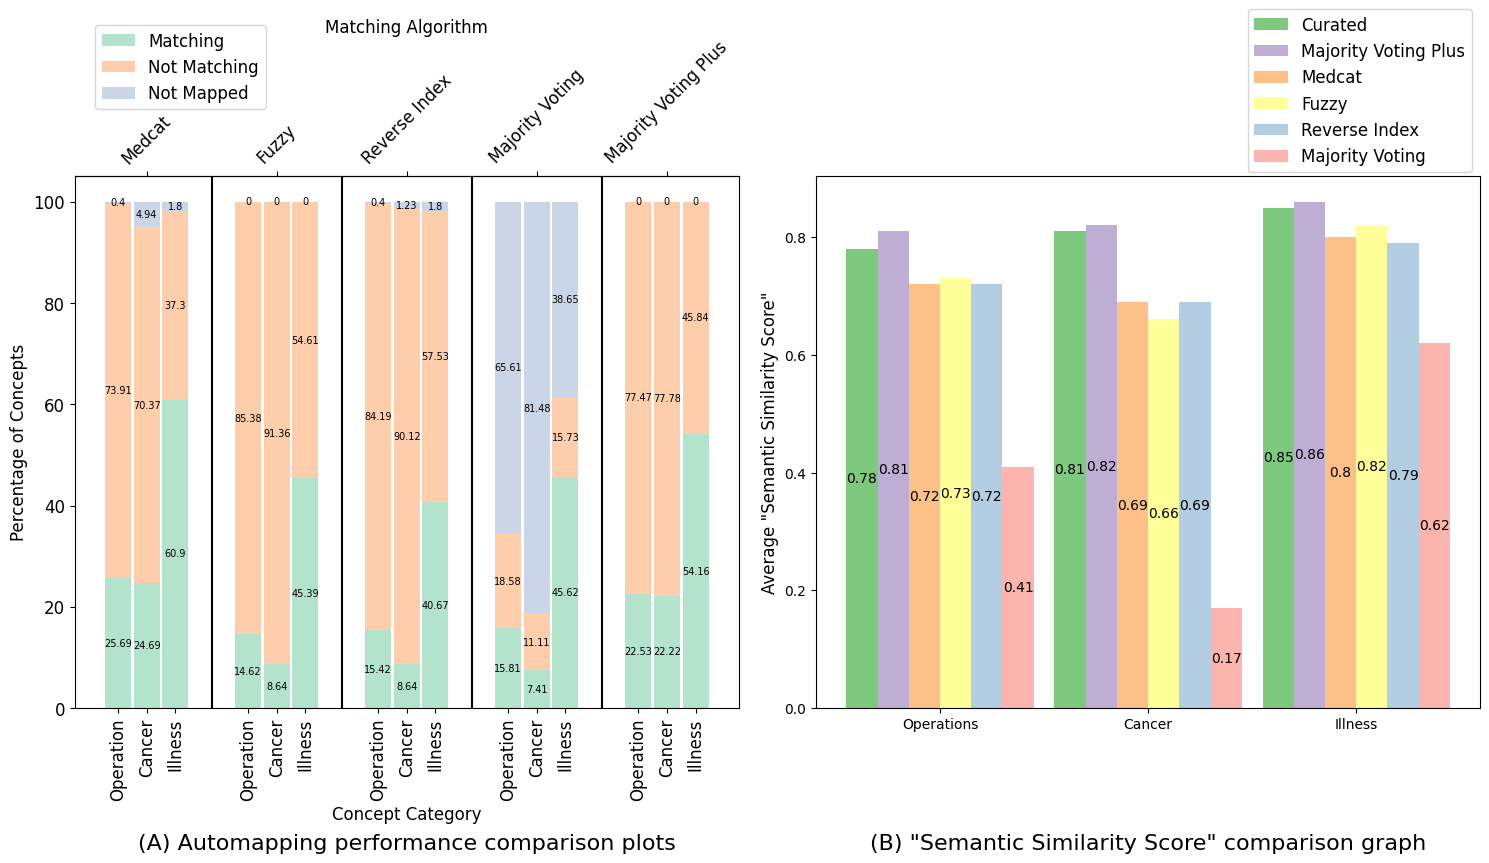

In [36]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Medcat', 'Fuzzy', 'Reverse Index', 'Majority Voting', 'Majority Voting Plus']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10), tight_layout=True)
ax1_t = ax1.secondary_xaxis('top')

# make bar plots
illness_matching_bar = ax1.bar(illness_bar_positions, illness_matching, bar_width, color='#b3e2cd', label='Matching')
illness_not_matching_bar = ax1.bar(illness_bar_positions, illness_not_matching, bar_width, color='#fdcdac', bottom=illness_matching, label='Not Matching')
illness_not_mapped_bar = ax1.bar(illness_bar_positions, illness_not_mapped, bar_width, color='#cbd5e8', bottom=illness_matching + illness_not_matching, label='Not Mapped')
cancer_matching_bar = ax1.bar(cancer_bar_positions, cancer_matching, bar_width, color='#b3e2cd')
cancer_not_matching_bar = ax1.bar(cancer_bar_positions, cancer_not_matching, bar_width, color='#fdcdac', bottom=cancer_matching)
cancer_not_mapped_bar = ax1.bar(cancer_bar_positions, cancer_not_mapped, bar_width, color='#cbd5e8', bottom=cancer_matching + cancer_not_matching)
operations_matching_bar = ax1.bar(operations_bar_positions, operations_matching, bar_width, color='#b3e2cd')
operations_not_matching_bar = ax1.bar(operations_bar_positions, operations_not_matching, bar_width, color='#fdcdac', bottom=operations_matching)
operations_not_mapped_bar = ax1.bar(operations_bar_positions, operations_not_mapped, bar_width, color='#cbd5e8', bottom=operations_matching + operations_not_matching)

ax1.bar_label(illness_matching_bar, label_type='center', fontsize=7)
ax1.bar_label(illness_not_matching_bar, label_type='center', fontsize=7)
ax1.bar_label(illness_not_mapped_bar, label_type='center', fontsize=7)
ax1.bar_label(cancer_matching_bar, label_type='center', fontsize=7)
ax1.bar_label(cancer_not_matching_bar, label_type='center', fontsize=7)
ax1.bar_label(cancer_not_mapped_bar, label_type='center', fontsize=7)
ax1.bar_label(operations_matching_bar, label_type='center', fontsize=7)
ax1.bar_label(operations_not_matching_bar, label_type='center', fontsize=7)
ax1.bar_label(operations_not_mapped_bar, label_type='center', fontsize=7)

ax1.axvline(x = 0.5, color='k')
ax1.axvline(x = 1.5, color='k')
ax1.axvline(x = 2.5, color='k')
ax1.axvline(x = 3.5, color='k')

ax1.set_xticks(np.append(np.append(operations_bar_positions, cancer_bar_positions), illness_bar_positions), labels=(['Operation'] * 5 + ['Cancer'] * 5 + ['Illness'] * 5), rotation=90, fontsize=12)
ax1_t.set_xticks(cancer_bar_positions, labels=labels, rotation=45, fontsize=12)
ax1_t.set_xlabel('Matching Algorithm', fontsize=12)
ax1.set_ylabel('Percentage of Concepts', fontsize=12)
ax1.set_xlabel('Concept Category', fontsize=12)
ax1.set_title('(A) Automapping performance comparison plots', fontsize=16, y=-0.2, pad=-25)
ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=12)
ax1.legend(bbox_to_anchor=(0.3, 1.3), fontsize=12)

labels = ['Operations', 'Cancer', 'Illness']

rects1 = ax2.bar(x - (5/2) * width, avg_curated_sss, width, label='Curated', color='#7fc97f')
rects2 = ax2.bar(x - (3/2) * width, avg_majority_voting_plus_sss, width, label='Majority Voting Plus', color='#beaed4')
rects3 = ax2.bar(x - (1/2) * width, avg_medcat_sss, width, label='Medcat', color='#fdc086')
rects4 = ax2.bar(x + (1/2) * width, avg_fuzzy_sss, width, label='Fuzzy', color='#ffff99')
rects5 = ax2.bar(x + (3/2) * width, avg_reverse_index_sss, width, label='Reverse Index', color='#b3cde3')
rects6 = ax2.bar(x + (5/2) * width, avg_majority_voting_sss, width, label='Majority Voting', color='#fbb4ae')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Average "Semantic Similarity Score"', fontsize=12)
ax2.set_title('(B) "Semantic Similarity Score" comparison graph', fontsize=16, y=-0.2, pad=-25)
ax2.set_xticks(x, labels)
ax2.legend(bbox_to_anchor=(1, 1.33), fontsize=12)


ax2.bar_label(rects1, label_type='center', fontsize=10)
ax2.bar_label(rects2, label_type='center', fontsize=10)
ax2.bar_label(rects3, label_type='center', fontsize=10)
ax2.bar_label(rects4, label_type='center', fontsize=10)
ax2.bar_label(rects5, label_type='center', fontsize=10)
ax2.bar_label(rects6, label_type='center', fontsize=10)

# ax2.tight_layout()

# l1 = ax1.get_legend()
# l2 = ax2.get_legend()
# ax1.legend(l1+l2, loc=2, bbox_to_anchor=(1, 1.33))

plt.show()